# FINAL PROJECT 3 (Ensemble Model)
## Oleh Group 6
- Kelas		    : KS-015
- Program	    : Python for Data Science

Anggota:
1.  - Nama          : Annisa Nur Hidayah
    - Kode peserta  : PYTN-KS15-002
2.  - Nama          : Lisa Wahyu Ningsih
    - Kode peserta  : PYTN-KS15-007
3.  - Nama          : Nadilla Nur 'Aini Yulian Putri
    - Kode peserta  : PYTN-KS15-012


# A. Introduction

Project ini berisi tentang Classification dengan Ensemble Model pada dataset Heart Failure Prediction yang dapat diakses melalui laman https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data . Data ini mengandung 13 kolom yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. DEATH EVENT adalah variabel target untuk diprediksi, apakah pasien sudah meninggal saat waktu follow-up dengan indikasi 1:Yes atau 0:No.



# B. Preprocessing Data
- Import Pustaka
- Data Loading
- Data Cleaning
- EDA (Exploration Data Analysis)

## B.1 Import Pustaka

In [159]:
# library membaca data
import numpy as np 
import pandas as pd
# libeary visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.svm import SVC
from sklearn import svm
# library analysis data
import scipy
from scipy.stats.mstats import winsorize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
# library alogritma ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import graphviz 
from sklearn.tree import export_graphviz
# library visualisasi akurasi data
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

import warnings
warnings.filterwarnings("ignore")
import pickle
from imblearn.over_sampling import SMOTE

## B.2 Data Loading 

In [156]:
# Membaca data csv
df=pd.read_csv('heart_failure_clinical_records_fp3.csv')


In [157]:
# menampilkan data teratas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [158]:
# menampilkan data terbawah
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [3]:
# memeriksa dimensi data
print(df.shape)

(299, 13)


In [4]:
# untuk melihat variabel apa saja yang ada pada data
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
# melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# untuk mengecek hasil statistik tiap kolom
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
#untuk melakukan transpose data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## B.3 Data Cleaning

### B.3.1 Cek Missing Value
untuk memeriksa apakah ada kolom yang memiliki nilai null

In [10]:
# untuk melihat adanya missing value
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
# untuk melihat adanya missing value
print(df.isnull().any())

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool


berdasarkan hasil output diatas menunjukkan bahwa tidak ada missing value pada data

In [12]:
# megecek adanya kolom yang duplikasi
df.duplicated().sum()

0

In [13]:
# mengecek tipe data
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [14]:
# melihat jumlah nilai unik pada kolom-kolom
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

### B.3.2 Cek Outlier

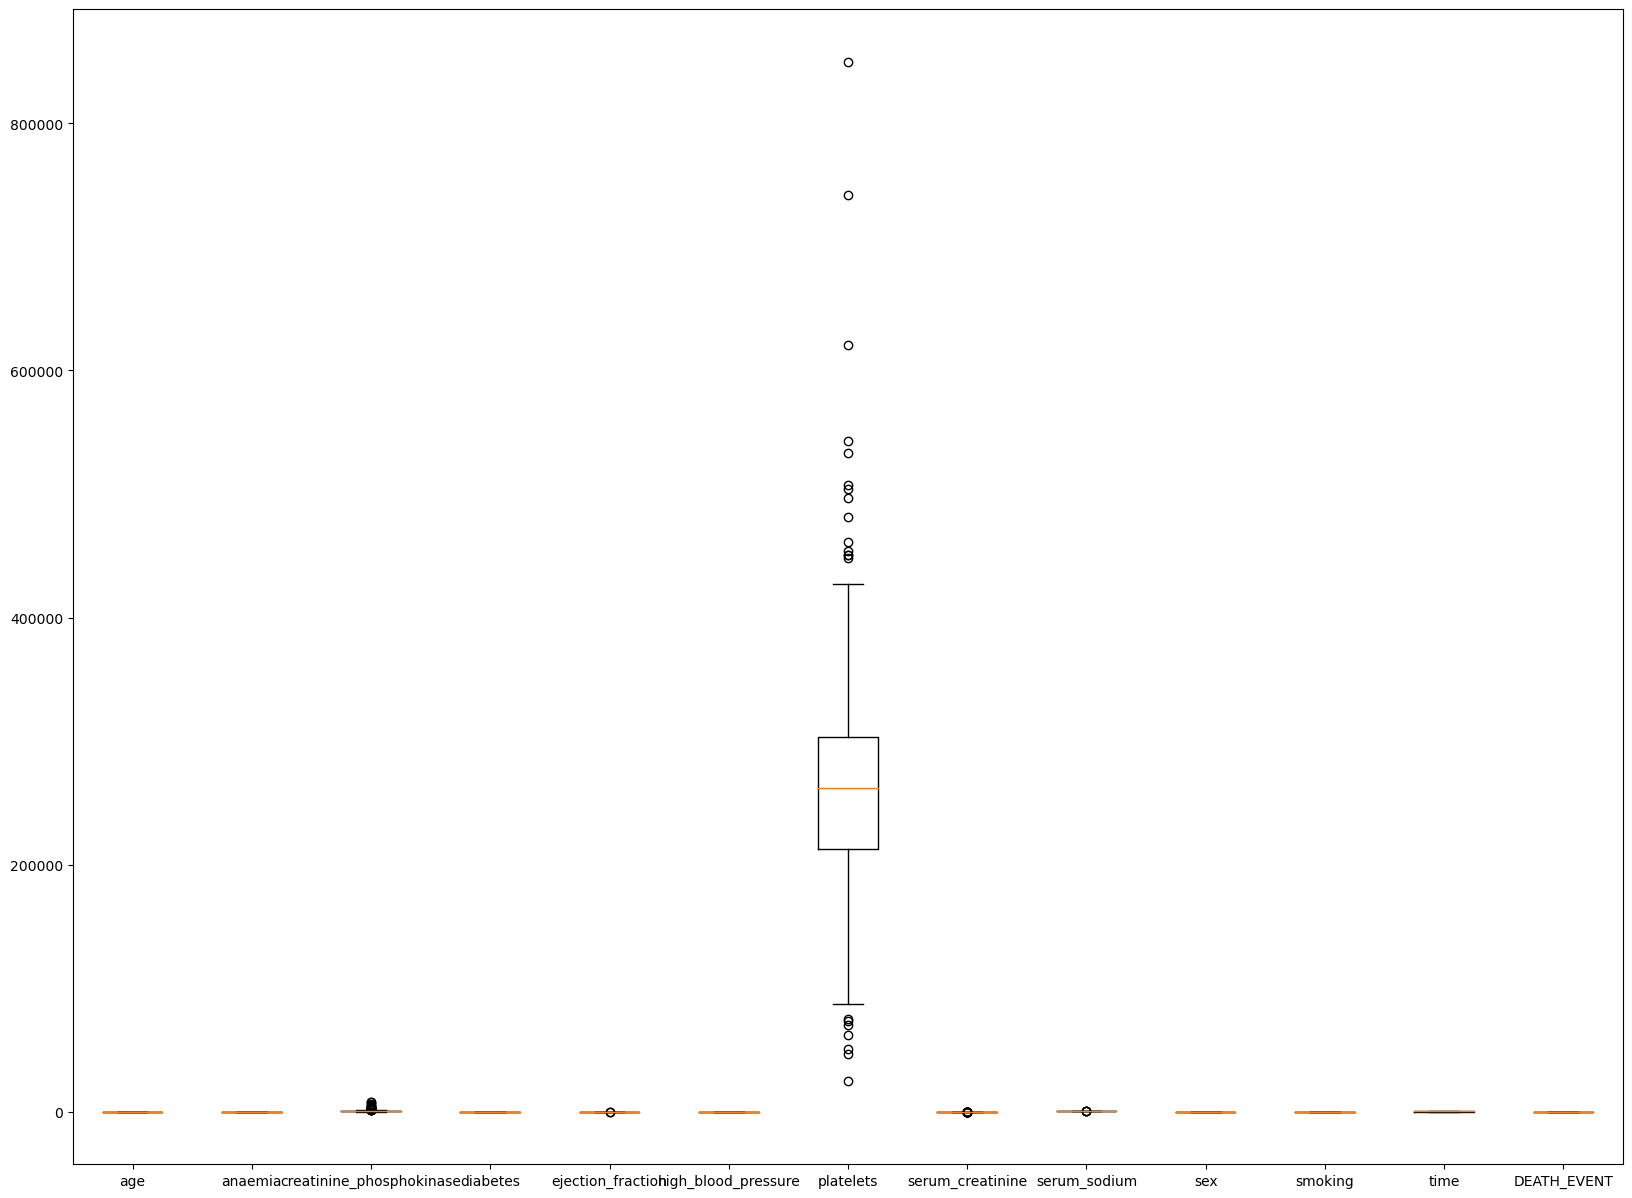

In [15]:
# Outliers values
plt.figure(figsize=(20, 15))
plt.boxplot(df, labels=df.columns)
plt.show()

Berdasarkan output diatas, terlihat bahwa ada outlier dibeberapa kolom seperti:
- creatinine phosphokinase
- ejection fraction
- platelets
- serum creatinine
- serum sodium

kolom: Creatinine phosphokinase

In [16]:
df.creatinine_phosphokinase.describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

Text(0.5, 1.0, 'Outliers values')

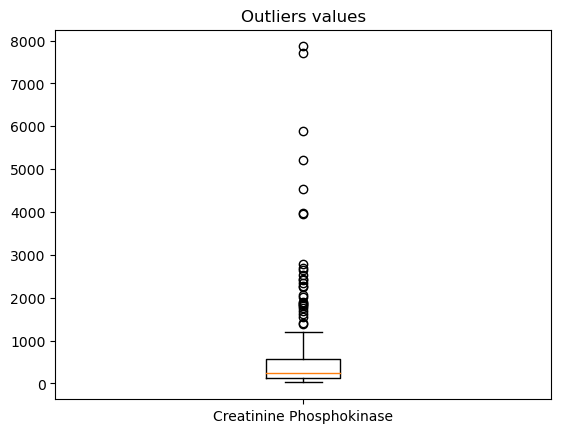

In [17]:
# plt.figure(figsize=(20, 15))
plt.boxplot(df['creatinine_phosphokinase'], labels=['Creatinine Phosphokinase'])
plt.title('Outliers values')

In [18]:
# menghapus outliers
q1 = df['creatinine_phosphokinase'].quantile(0.25)
q3 = df['creatinine_phosphokinase'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'creatinine_phosphokinase'] > toprange:
        df.loc[i, 'creatinine_phosphokinase'] = toprange
    if df.loc[i, 'creatinine_phosphokinase'] < botrange:
        df.loc[i, 'creatinine_phosphokinase'] = botrange

Text(0.5, 1.0, 'Cleaning Outlier values')

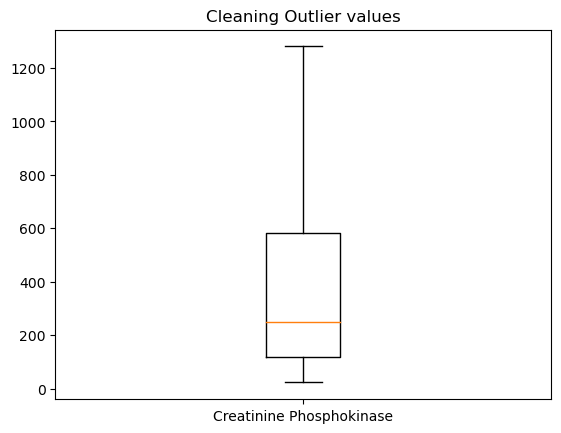

In [19]:
# plt.figure(figsize=(20, 15))
plt.boxplot(df['creatinine_phosphokinase'], labels=['Creatinine Phosphokinase'])
plt.title('Cleaning Outlier values')

kolom: ejection fraction

In [20]:
df.ejection_fraction.describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

Text(0.5, 1.0, 'Outliers values')

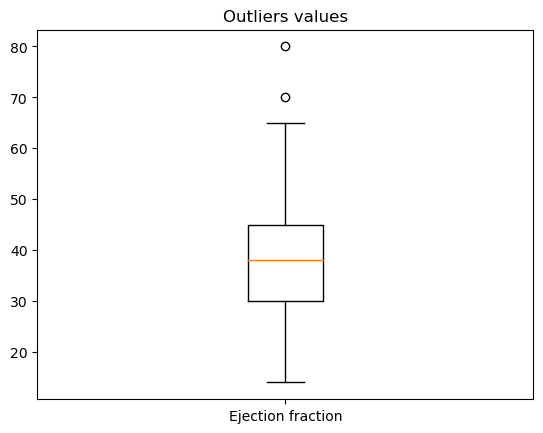

In [21]:
# plt.figure(figsize=(20, 15))
plt.boxplot(df['ejection_fraction'], labels=['Ejection fraction'])
plt.title('Outliers values')

In [22]:
# menghilangkan outliers
q1 = df['ejection_fraction'].quantile(0.25)
q3 = df['ejection_fraction'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'ejection_fraction'] > toprange:
        df.loc[i, 'ejection_fraction'] = toprange
    if df.loc[i, 'ejection_fraction'] < botrange:
        df.loc[i, 'ejection_fraction'] = botrange

Text(0.5, 1.0, 'Cleaning values')

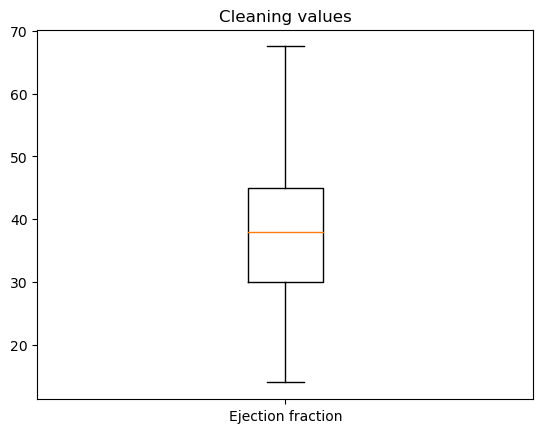

In [23]:
# plt.figure(figsize=(20, 15))
plt.boxplot(df['ejection_fraction'], labels=['Ejection fraction'])
plt.title('Cleaning values')

kolom: platelets

In [24]:
df.platelets.describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

Text(0.5, 1.0, 'Outliers values')

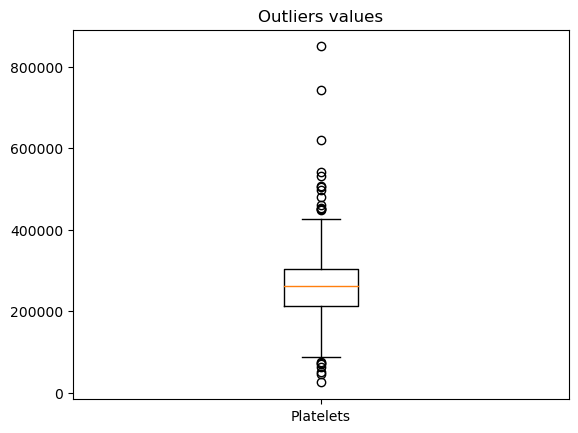

In [25]:
# plt.figure(figsize=(20, 15))
plt.boxplot(df['platelets'], labels=['Platelets'])
plt.title('Outliers values')

In [26]:
# menghilangkan outliers
q1 = df.platelets.quantile(0.25)
q3 = df.platelets.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'platelets'] > toprange:
        df.loc[i, 'platelets'] = toprange
    if df.loc[i, 'platelets'] < botrange:
        df.loc[i, 'platelets'] = botrange

Text(0.5, 1.0, 'Cleaning values')

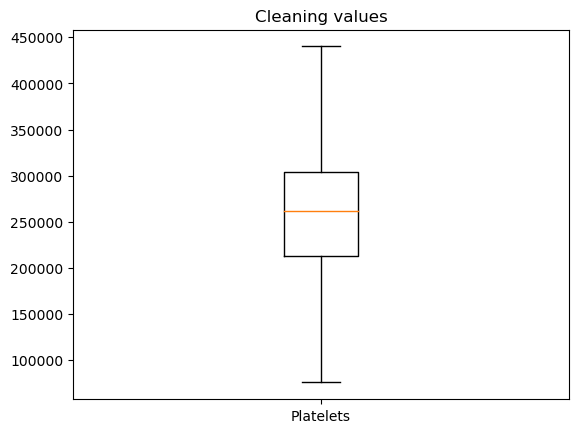

In [27]:
# plt.figure(figsize=(20, 15))
plt.boxplot(df['platelets'], labels=['Platelets'])
plt.title('Cleaning values')

kolom: serum creatinine

In [28]:
df.serum_creatinine.describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

Text(0.5, 1.0, 'Outliers values')

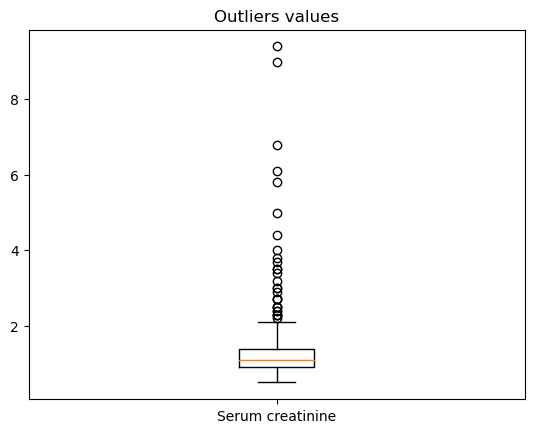

In [29]:
# plt.figure(figsize=(20, 15))
plt.boxplot(df['serum_creatinine'], labels=['Serum creatinine'])
plt.title('Outliers values')

In [30]:
# menghilangkan outliers
q1 = df.serum_creatinine.quantile(0.25)
q3 = df.serum_creatinine.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'serum_creatinine'] > toprange:
        df.loc[i, 'serum_creatinine'] = toprange
    if df.loc[i, 'serum_creatinine'] < botrange:
        df.loc[i, 'serum_creatinine'] = botrange

Text(0.5, 1.0, 'Cleaning values')

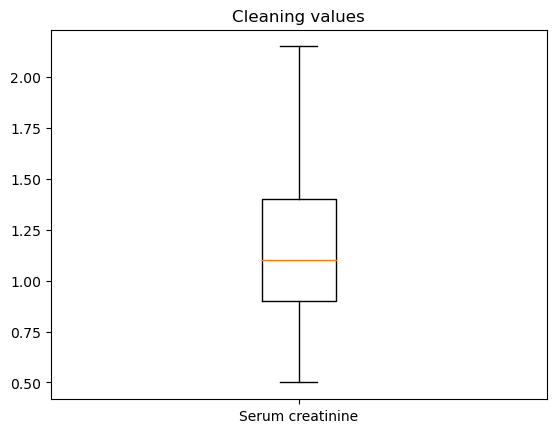

In [31]:
# plt.figure(figsize=(20, 15))
plt.boxplot(df['serum_creatinine'], labels=['Serum creatinine'])
plt.title('Cleaning values')

kolom: serum sodium

In [32]:
df.serum_sodium.describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

Text(0.5, 1.0, 'Outliers values')

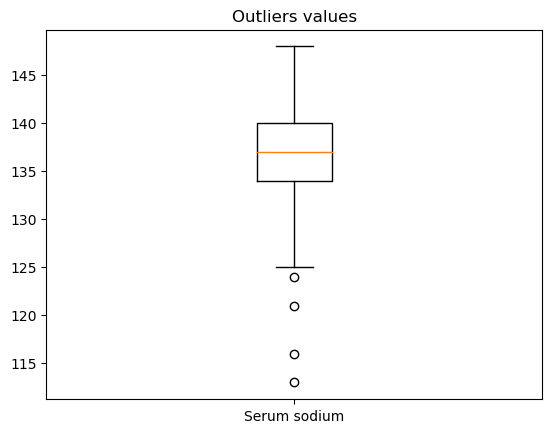

In [33]:
# plt.figure(figsize=(20, 15))
plt.boxplot(df['serum_sodium'], labels=['Serum sodium'])
plt.title('Outliers values')

In [34]:
# menghilangkan outliers
q1 = df.serum_sodium.quantile(0.25)
q3 = df.serum_sodium.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'serum_sodium'] > toprange:
        df.loc[i, 'serum_sodium'] = toprange
    if df.loc[i, 'serum_sodium'] < botrange:
        df.loc[i, 'serum_sodium'] = botrange

Text(0.5, 1.0, 'Cleaning values')

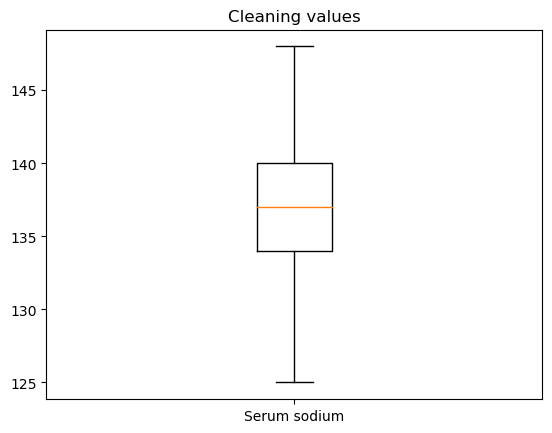

In [35]:
# plt.figure(figsize=(20, 15))
plt.boxplot(df['serum_sodium'], labels=['Serum sodium'])
plt.title('Cleaning values')

Hasil setelah handle outliers

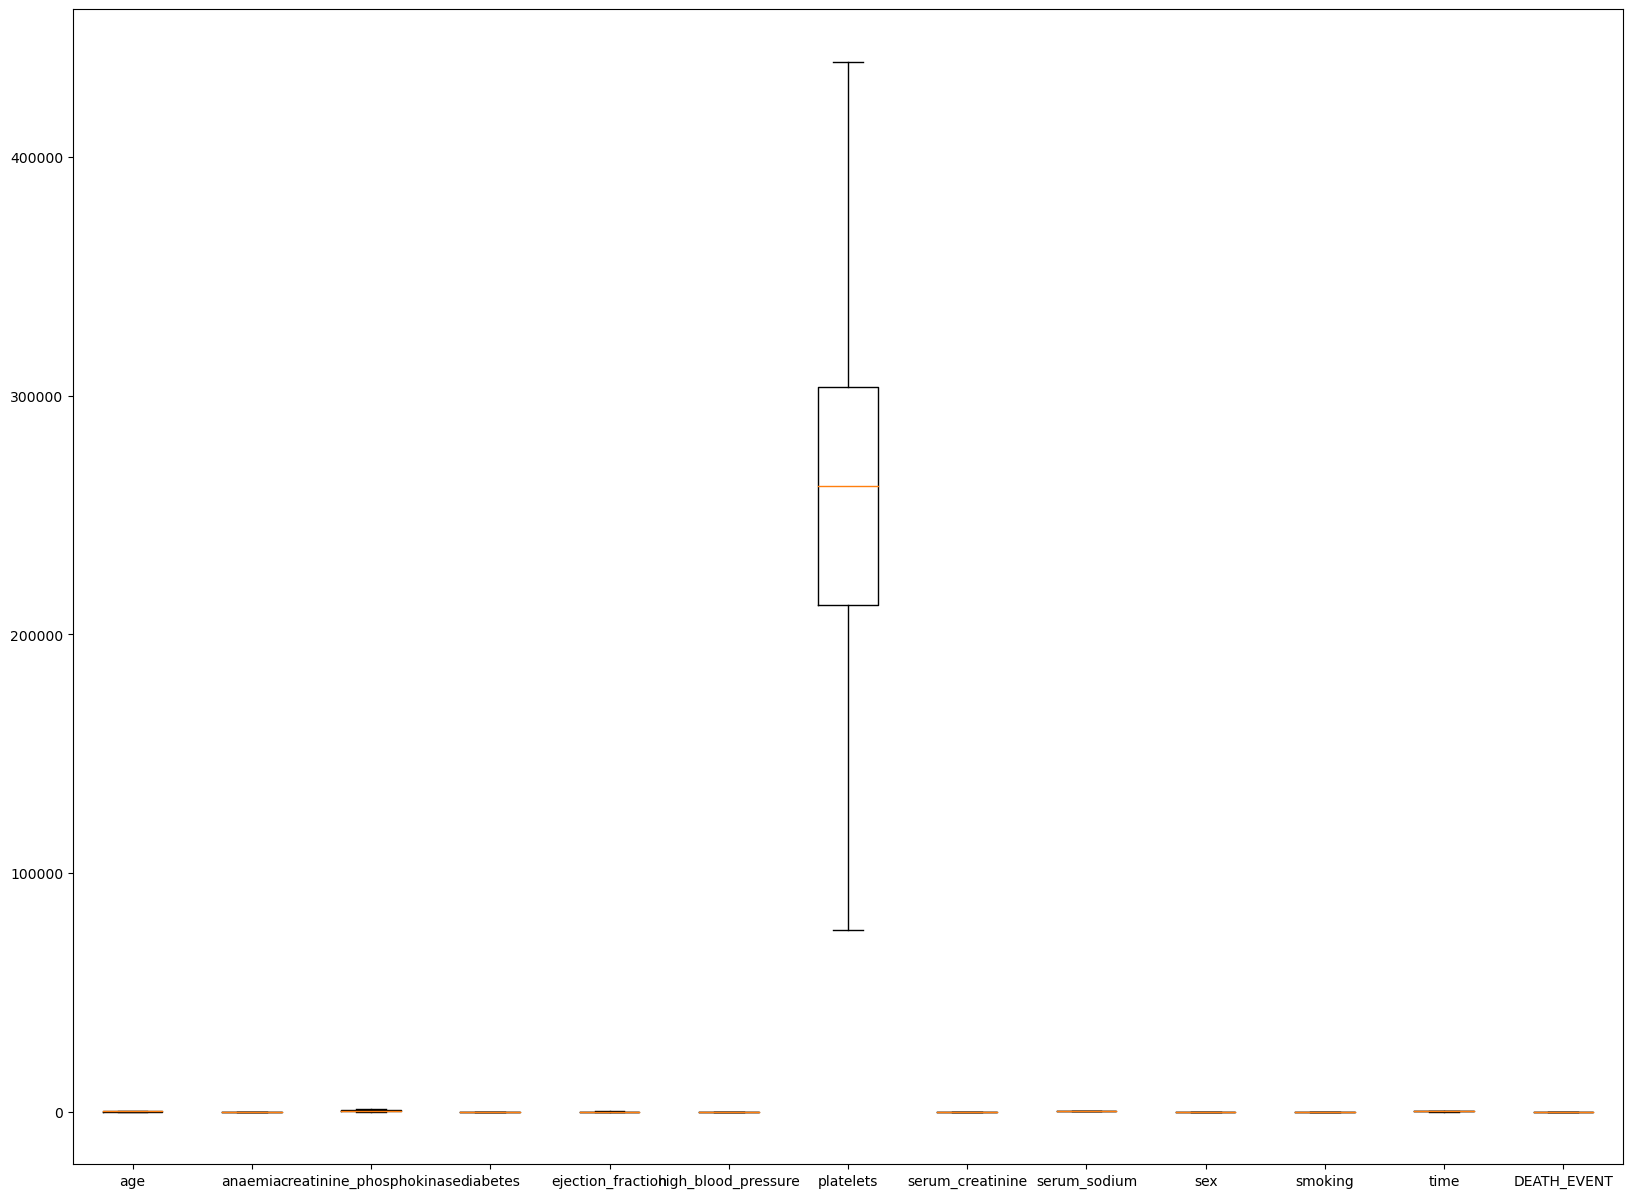

In [36]:
#Setelah menghandle semua outliers
plt.figure(figsize=(20, 15))
plt.boxplot(df, labels=df.columns)
plt.show()

drop data yang tidak diperlukan

In [37]:
df.drop('time', axis=1, inplace=True)

## B.4 Exploration Data Analysis (EDA)

In [39]:
df.min()

age                            40.0
anaemia                         0.0
creatinine_phosphokinase       23.0
diabetes                        0.0
ejection_fraction              14.0
high_blood_pressure             0.0
platelets                   76000.0
serum_creatinine                0.5
serum_sodium                  125.0
sex                             0.0
smoking                         0.0
DEATH_EVENT                     0.0
dtype: float64

In [40]:
df.max()

age                             95.00
anaemia                          1.00
creatinine_phosphokinase      1280.25
diabetes                         1.00
ejection_fraction               67.50
high_blood_pressure              1.00
platelets                   440000.00
serum_creatinine                 2.15
serum_sodium                   148.00
sex                              1.00
smoking                          1.00
DEATH_EVENT                      1.00
dtype: float64

In [41]:
df.loc[:, ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].describe()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,424.214883,38.033445,259163.714883,1.234515,136.712375
std,385.449328,11.685643,81478.304369,0.440098,4.076971
min,23.000000,14.000000,76000.000000,0.500000,125.000000
25%,116.500000,30.000000,212500.000000,0.900000,134.000000
50%,250.000000,38.000000,262000.000000,1.100000,137.000000
75%,582.000000,45.000000,303500.000000,1.400000,140.000000
max,1280.250000,67.500000,440000.000000,2.150000,148.000000


Anaemia is a boolean column (  0:no   and   1:yes  )

In [42]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [43]:
df.groupby('anaemia')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
anaemia,,,,,,,,
0,170.0,59.923529,11.906441,40.0,50.0,60.0,70.0,94.0
1,129.0,62.033597,11.818421,40.0,53.0,60.0,68.0,95.0


In [44]:
df.groupby('anaemia')['age'].unique()

anaemia
0    [75.0, 55.0, 65.0, 62.0, 45.0, 53.0, 80.0, 70....
1    [50.0, 65.0, 90.0, 75.0, 60.0, 80.0, 45.0, 49....
Name: age, dtype: object

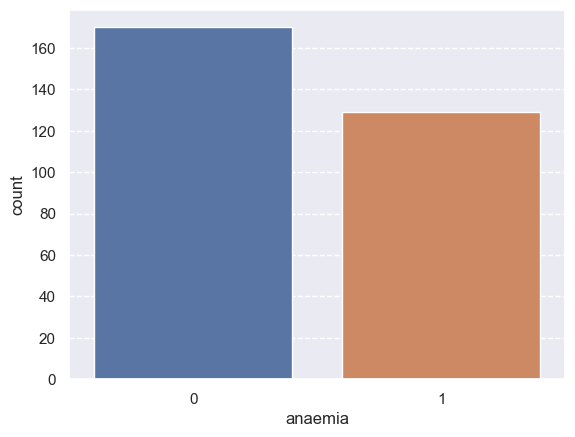

In [161]:
sns.countplot(x = df['anaemia'])
plt.show()

Diabetes is a boolean column (  0:no  and  1:yes)

In [46]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [47]:
df.groupby('diabetes')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,174.0,61.850575,12.721134,40.0,52.0,60.0,70.0,95.0
1,125.0,59.418672,10.525180,40.0,50.0,60.0,65.0,94.0


In [48]:
df.groupby('diabetes')['age'].unique()

diabetes
0    [75.0, 55.0, 65.0, 50.0, 90.0, 80.0, 62.0, 45....
1    [65.0, 60.0, 48.0, 53.0, 75.0, 80.0, 70.0, 82....
Name: age, dtype: object

In [49]:
df.groupby('diabetes')['anaemia'].value_counts()

diabetes  anaemia
0         0          98
          1          76
1         0          72
          1          53
Name: anaemia, dtype: int64

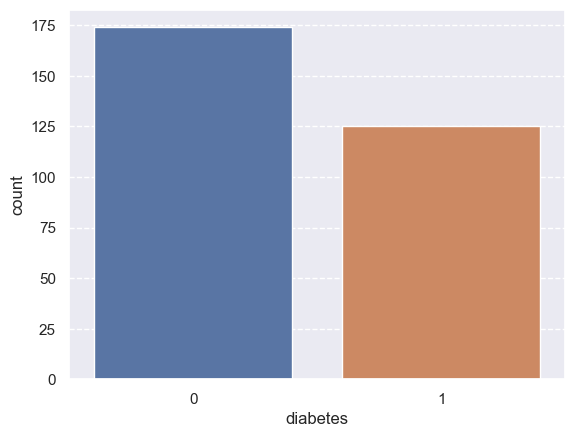

In [162]:
sns.countplot(x = df['diabetes'])
plt.show()

High Blood Pressure is a boolean column ( 0:no and 1:yes)

In [51]:
df.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [52]:
df.groupby('high_blood_pressure')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
high_blood_pressure,,,,,,,,
0,194.0,60.018902,12.045547,40.0,50.0,60.0,66.5,95.0
1,105.0,62.339686,11.516151,40.0,53.0,62.0,70.0,95.0


In [53]:
df.groupby('high_blood_pressure')['age'].unique()

high_blood_pressure
0    [55.0, 65.0, 50.0, 75.0, 60.0, 45.0, 82.0, 87....
1    [75.0, 90.0, 80.0, 62.0, 50.0, 49.0, 70.0, 65....
Name: age, dtype: object

In [54]:
df.groupby('high_blood_pressure')['anaemia'].value_counts()

high_blood_pressure  anaemia
0                    0          113
                     1           81
1                    0           57
                     1           48
Name: anaemia, dtype: int64

In [55]:
df.groupby('high_blood_pressure')['diabetes'].value_counts()

high_blood_pressure  diabetes
0                    0           112
                     1            82
1                    0            62
                     1            43
Name: diabetes, dtype: int64

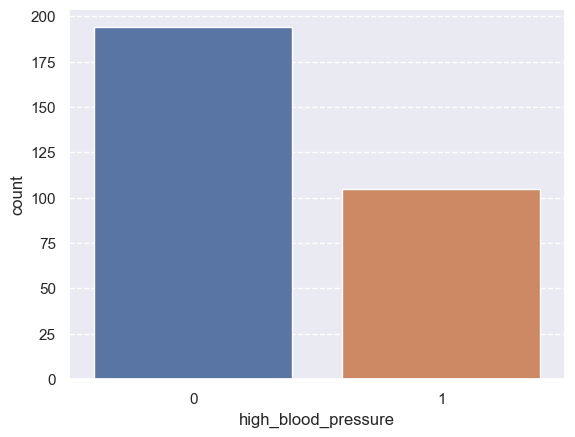

In [163]:
sns.countplot(x = df['high_blood_pressure'])
plt.show()

sex is a boolean column (  0:females    and     1:males)

In [57]:
df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

In [58]:
df.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,105.0,59.777781,11.240919,40.0,50.0,60.0,66.0,95.0
1,194.0,61.405500,12.224415,40.0,52.0,60.0,70.0,95.0


In [59]:
df.groupby('sex')['age'].unique()

sex
0    [65.0, 49.0, 70.0, 48.0, 75.0, 95.0, 50.0, 82....
1    [75.0, 55.0, 65.0, 50.0, 90.0, 60.0, 80.0, 62....
Name: age, dtype: object

In [60]:
df.groupby('sex')['anaemia'].value_counts()

sex  anaemia
0    0           53
     1           52
1    0          117
     1           77
Name: anaemia, dtype: int64

In [61]:
df.groupby('sex')['diabetes'].value_counts()

sex  diabetes
0    1            55
     0            50
1    0           124
     1            70
Name: diabetes, dtype: int64

In [62]:
df.groupby('sex')['high_blood_pressure'].value_counts()

sex  high_blood_pressure
0    0                       61
     1                       44
1    0                      133
     1                       61
Name: high_blood_pressure, dtype: int64

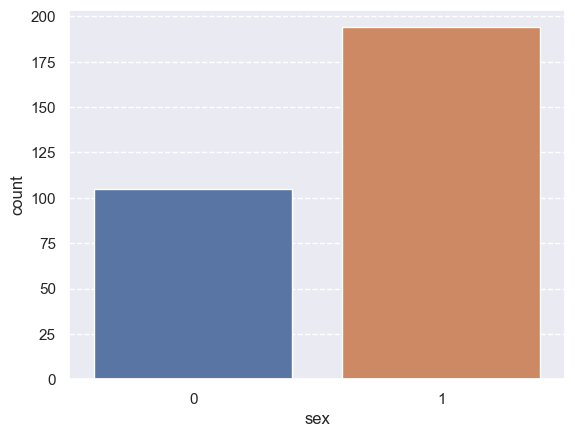

In [164]:
sns.countplot(x = df['sex'])
plt.show()

Smoking is a boolean column (  0:no   and   1:yes)

In [64]:
df.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [65]:
df.groupby('smoking')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
smoking,,,,,,,,
0,203.0,60.681448,12.157714,40.0,50.0,60.0,68.5,95.0
1,96.0,61.156250,11.374328,40.0,52.0,60.0,70.0,90.0


In [66]:
df.groupby('smoking')['age'].unique()

smoking
0    [75.0, 55.0, 50.0, 65.0, 45.0, 49.0, 82.0, 87....
1    [65.0, 90.0, 60.0, 80.0, 75.0, 62.0, 68.0, 70....
Name: age, dtype: object

In [67]:
df.groupby('smoking')['anaemia'].value_counts()

smoking  anaemia
0        0          108
         1           95
1        0           62
         1           34
Name: anaemia, dtype: int64

In [68]:
df.groupby('smoking')['diabetes'].value_counts()

smoking  diabetes
0        0           108
         1            95
1        0            66
         1            30
Name: diabetes, dtype: int64

In [69]:
df.groupby('smoking')['high_blood_pressure'].value_counts()

smoking  high_blood_pressure
0        0                      128
         1                       75
1        0                       66
         1                       30
Name: high_blood_pressure, dtype: int64

In [70]:
df.groupby('sex')['smoking'].value_counts()

sex  smoking
0    0          101
     1            4
1    0          102
     1           92
Name: smoking, dtype: int64

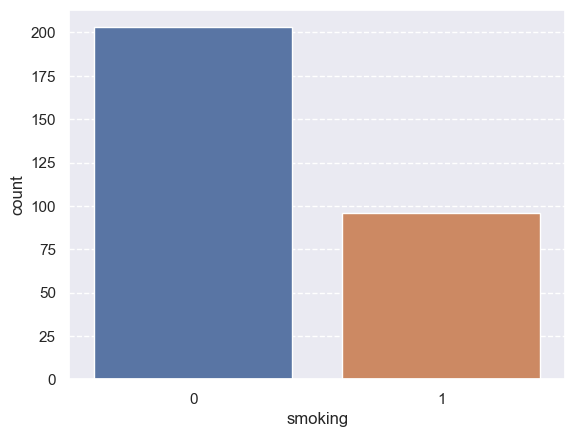

In [165]:
sns.countplot(x = df['smoking'])
plt.show()

korelasi antara age/sex and the anaemia, diabetes, high blood pressure and smoking

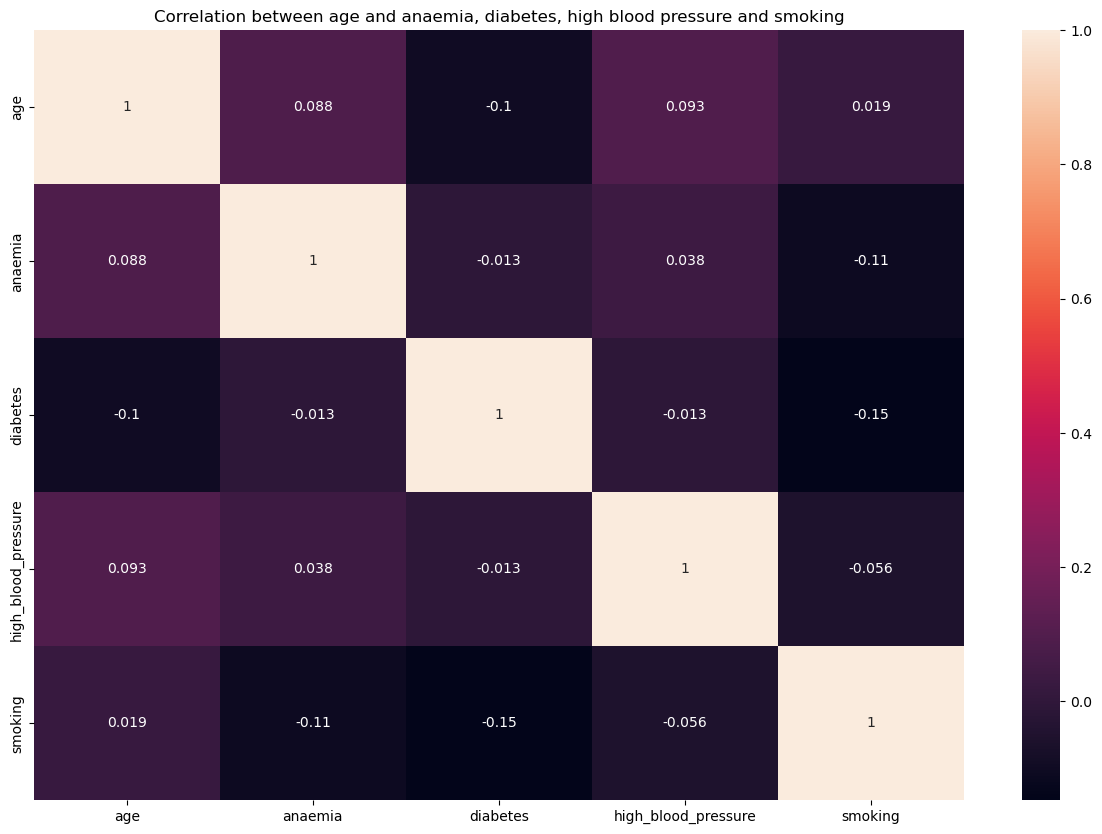

In [72]:
# Korelasi antara umur dan penderita anemia, diabetes, tekanan darah tinggi, dan perokok
plt.figure(figsize=(15, 10))
sns.heatmap(df.loc[:, ['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking']].corr(), annot=True)
plt.title('Correlation between age and anaemia, diabetes, high blood pressure and smoking')
plt.show()

- Interpretasi Output:
Berdasarkan output diatas, umur memiliki korelasi yang sangat lemah (<0.2) dengan anemia, diabetes, tekanan darah tinggi dan juga perokok. tingkat korelasi juga bisa dilihat dari warna yang tertera, semakin terang warnanya maka semakin kuat korelasinya.

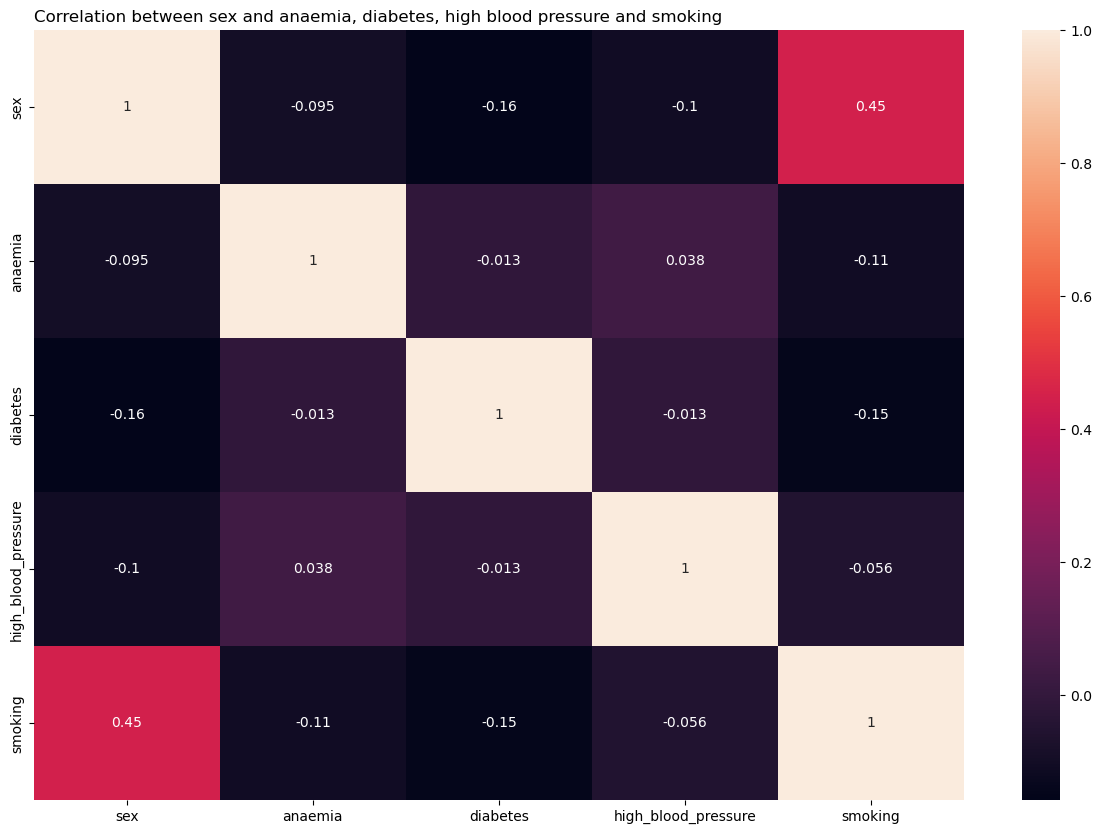

In [73]:
#Korelasi gender dengan penderita anemia, diabetes, tekanan darah tinggi, dan perokok
plt.figure(figsize=(15, 10))
sns.heatmap(df.loc[:, ['sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking']].corr(), annot=True)
plt.title('Correlation between sex and anaemia, diabetes, high blood pressure and smoking', loc='left')
plt.show()

- Interpretasi Output:
 Berdasarkan output diatas, gender (sex) memiliki korelasi yang sedang cenderung kuat dengan variabel smoking dengan nilai (0.45), sedangkan yang lainnya memiliki korelasi yang sangat lemah (<0.2). tingkat korelasi juga bisa dilihat dari warna yang tertera, semakin terang warnanya maka semakin kuat korelasinya.

#### Kasus Kematian (Death Cases)
DEATH EVENT is a boolean column (   0:no   and  1:yes )

In [74]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [75]:
df.groupby('DEATH_EVENT')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,58.761906,10.637890,40.0,50.0,60.0,65.0,90.0
1,96.0,65.215281,13.214556,42.0,55.0,65.0,75.0,95.0


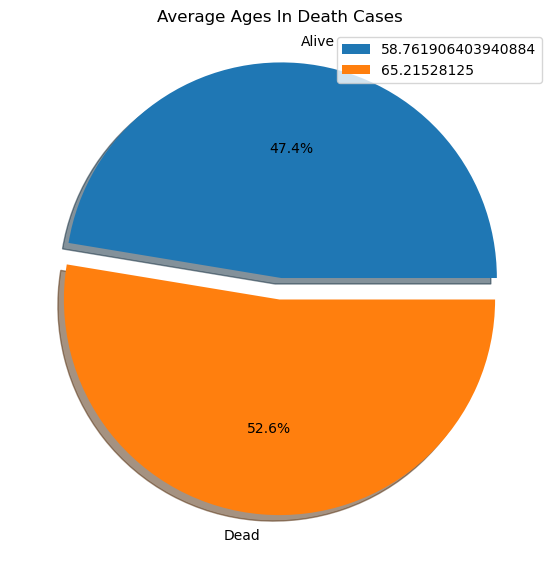

In [76]:
plt.figure(figsize=(10, 7))
death_age = df.groupby('DEATH_EVENT')['age'].mean()
myexplode = [0.1, 0]
plt.pie(death_age, autopct='%.1f%%', labels=['Alive', 'Dead'], explode=myexplode, shadow=True)
plt.title('Average Ages In Death Cases')
plt.legend(death_age, loc='upper right')
plt.show()

In [77]:
df.groupby('DEATH_EVENT')['age'].unique()

DEATH_EVENT
0    [49.0, 65.0, 53.0, 50.0, 60.0, 72.0, 70.0, 55....
1    [75.0, 55.0, 65.0, 50.0, 90.0, 60.0, 80.0, 62....
Name: age, dtype: object

In [78]:
df.groupby('DEATH_EVENT')['anaemia'].value_counts()

DEATH_EVENT  anaemia
0            0          120
             1           83
1            0           50
             1           46
Name: anaemia, dtype: int64

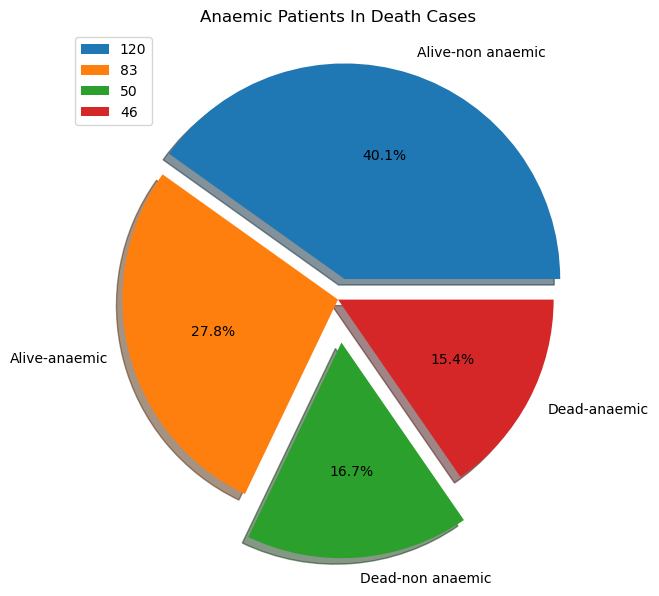

In [79]:
plt.figure(figsize=(10, 7))
death_anae = df.groupby('DEATH_EVENT')['anaemia'].value_counts()
myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_anae, autopct='%.1f%%', labels=['Alive-non anaemic', 'Alive-anaemic', 'Dead-non anaemic', 'Dead-anaemic'], explode=myexplode, shadow=True)
plt.title('Anaemic Patients In Death Cases')
plt.legend(death_anae, loc='upper left')
plt.show()

In [80]:
df.groupby('DEATH_EVENT')['diabetes'].value_counts()

DEATH_EVENT  diabetes
0            0           118
             1            85
1            0            56
             1            40
Name: diabetes, dtype: int64

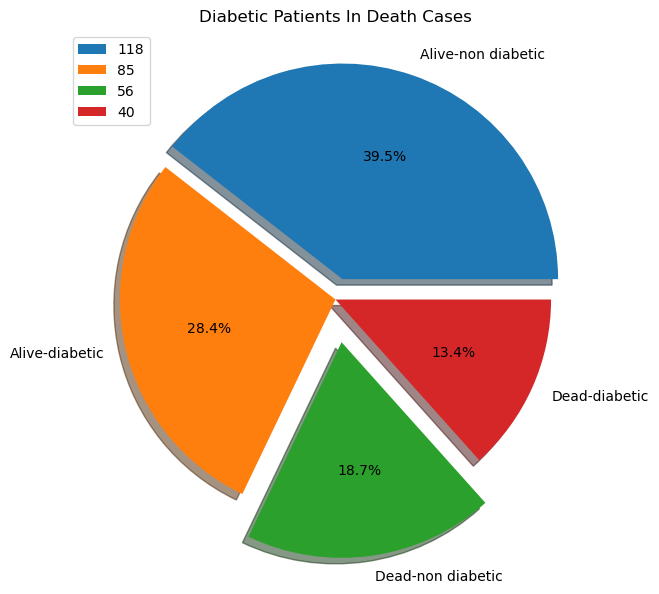

In [81]:
plt.figure(figsize=(10, 7))
death_diab = df.groupby('DEATH_EVENT')['diabetes'].value_counts()
myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_diab, autopct='%.1f%%', labels=['Alive-non diabetic', 'Alive-diabetic', 'Dead-non diabetic', 'Dead-diabetic'], explode=myexplode, shadow=True)
plt.title('Diabetic Patients In Death Cases')
plt.legend(death_diab, loc='upper left')
plt.show()

In [82]:
df.groupby('DEATH_EVENT')['high_blood_pressure'].value_counts()

DEATH_EVENT  high_blood_pressure
0            0                      137
             1                       66
1            0                       57
             1                       39
Name: high_blood_pressure, dtype: int64

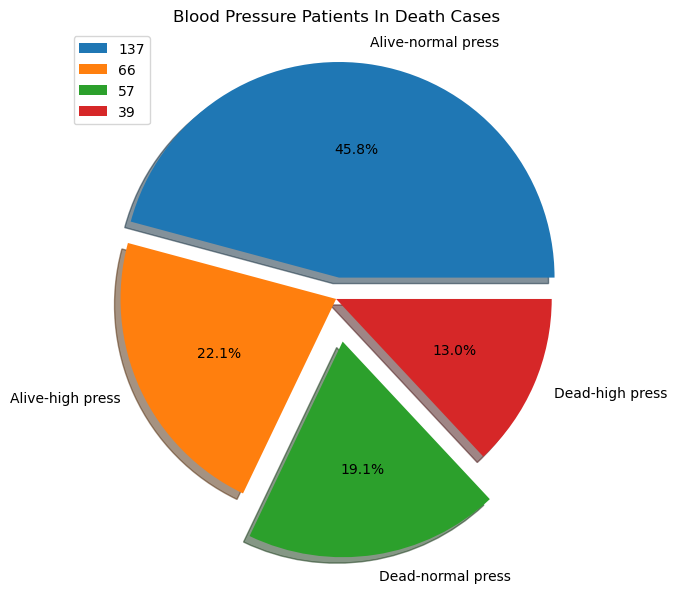

In [83]:
plt.figure(figsize=(10, 7))
death_hbp = df.groupby('DEATH_EVENT')['high_blood_pressure'].value_counts()
myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_hbp, autopct='%.1f%%', labels=['Alive-normal press', 'Alive-high press', 'Dead-normal press', 'Dead-high press'], explode=myexplode, shadow=True)
plt.title('Blood Pressure Patients In Death Cases')
plt.legend(death_hbp, loc='upper left')
plt.show()

In [84]:
df.groupby('DEATH_EVENT')['smoking'].value_counts()

DEATH_EVENT  smoking
0            0          137
             1           66
1            0           66
             1           30
Name: smoking, dtype: int64

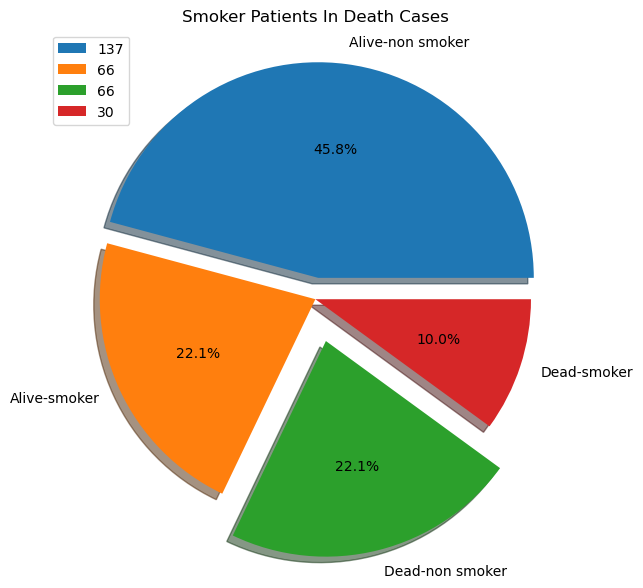

In [85]:
plt.figure(figsize=(10, 7))
death_smok = df.groupby('DEATH_EVENT')['smoking'].value_counts()
myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_smok, autopct='%.1f%%', labels=['Alive-non smoker', 'Alive-smoker', 'Dead-non smoker', 'Dead-smoker'], explode=myexplode, shadow=True)
plt.title('Smoker Patients In Death Cases')
plt.legend(death_smok, loc='upper left')
plt.show()

In [86]:
df.groupby('DEATH_EVENT')['sex'].value_counts()

DEATH_EVENT  sex
0            1      132
             0       71
1            1       62
             0       34
Name: sex, dtype: int64

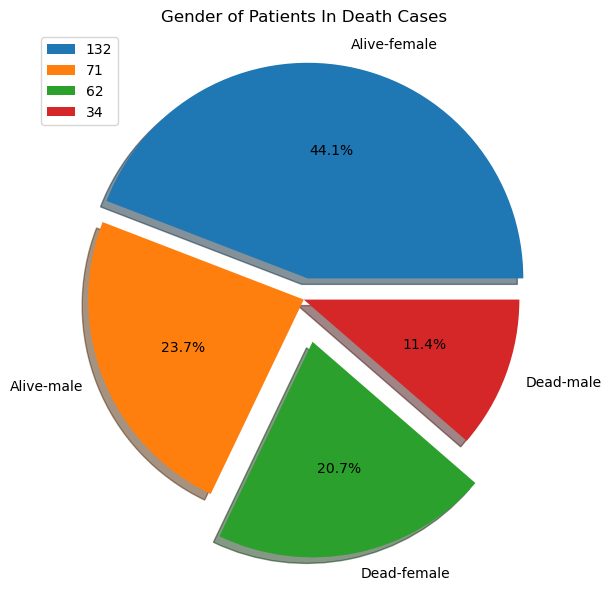

In [87]:
plt.figure(figsize=(10, 7))
death_sex = df.groupby('DEATH_EVENT')['sex'].value_counts()
myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_sex, autopct='%.1f%%', labels=['Alive-female', 'Alive-male', 'Dead-female', 'Dead-male'], explode=myexplode, shadow=True)
plt.title('Gender of Patients In Death Cases')
plt.legend(death_sex, loc='upper left')
plt.show()

In [88]:
df.groupby('DEATH_EVENT')['creatinine_phosphokinase'].mean()

DEATH_EVENT
0    425.896552
1    420.658854
Name: creatinine_phosphokinase, dtype: float64

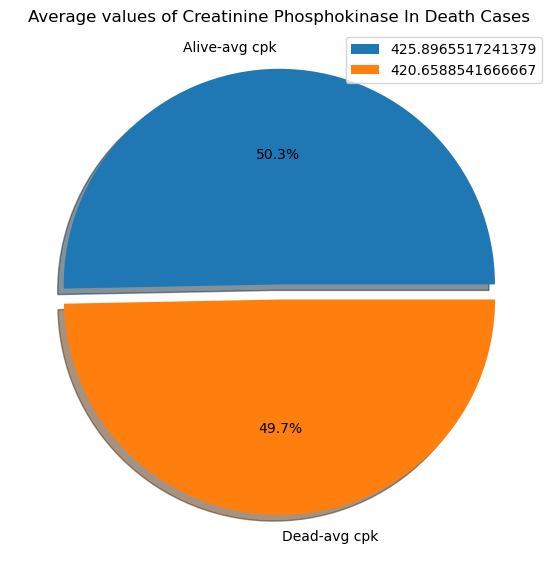

In [89]:
plt.figure(figsize=(10, 7))
death_cpk = df.groupby('DEATH_EVENT')['creatinine_phosphokinase'].mean()
myexplode = [0.07, 0]
plt.pie(death_cpk, autopct='%.1f%%', labels=['Alive-avg cpk', 'Dead-avg cpk'], explode=myexplode, shadow=True)
plt.title('Average values of Creatinine Phosphokinase In Death Cases')
plt.legend(death_cpk, loc='upper right')
plt.show()

In [90]:
df.groupby('DEATH_EVENT')['ejection_fraction'].mean()

DEATH_EVENT
0    40.204433
1    33.442708
Name: ejection_fraction, dtype: float64

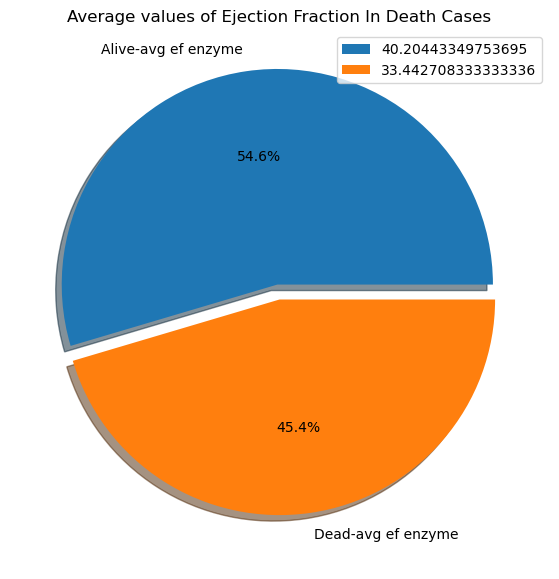

In [91]:
plt.figure(figsize=(10, 7))
death_ef = df.groupby('DEATH_EVENT')['ejection_fraction'].mean()
myexplode = [0.07, 0]
plt.pie(death_ef, autopct='%.1f%%', labels=['Alive-avg ef enzyme', 'Dead-avg ef enzyme'], explode=myexplode, shadow=True)
plt.title('Average values of Ejection Fraction In Death Cases')
plt.legend(death_ef, loc='upper right')
plt.show()

In [92]:
df.groupby('DEATH_EVENT')['platelets'].mean()

DEATH_EVENT
0    261632.366749
1    253943.544792
Name: platelets, dtype: float64

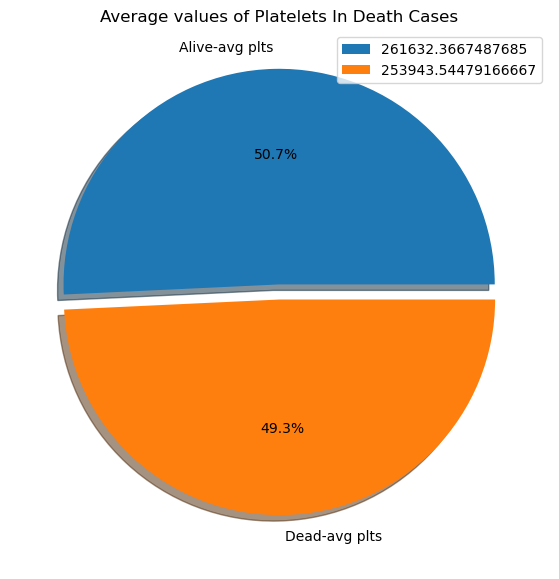

In [93]:
plt.figure(figsize=(10, 7))
death_plts = df.groupby('DEATH_EVENT')['platelets'].mean()
myexplode = [0.07, 0]
plt.pie(death_plts, autopct='%.1f%%', labels=['Alive-avg plts', 'Dead-avg plts'], explode=myexplode, shadow=True)
plt.title('Average values of Platelets In Death Cases')
plt.legend(death_plts, loc='upper right')
plt.show()

In [94]:
df.groupby('DEATH_EVENT')['serum_creatinine'].mean()

DEATH_EVENT
0    1.117143
1    1.482708
Name: serum_creatinine, dtype: float64

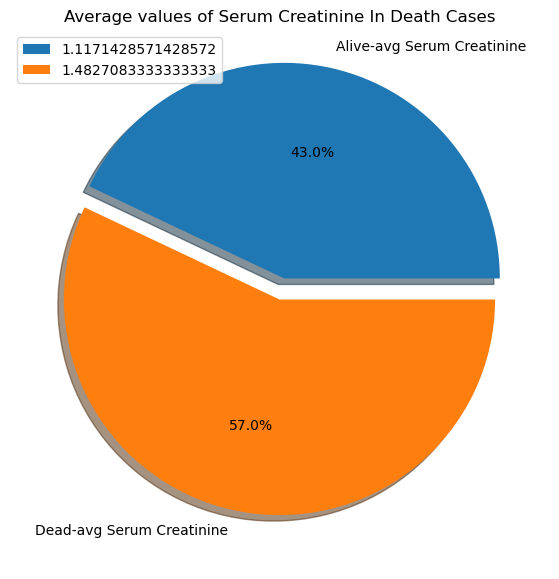

In [95]:
plt.figure(figsize=(10, 7))
death_SC = df.groupby('DEATH_EVENT')['serum_creatinine'].mean()
myexplode = [0.1, 0]
plt.pie(death_SC, autopct='%.1f%%', labels=['Alive-avg Serum Creatinine', 'Dead-avg Serum Creatinine'], explode=myexplode, shadow=True)
plt.title('Average values of Serum Creatinine In Death Cases')
plt.legend(death_SC, loc='upper left')
plt.show()

In [96]:
df.groupby('DEATH_EVENT')['serum_sodium'].mean()

DEATH_EVENT
0    137.275862
1    135.520833
Name: serum_sodium, dtype: float64

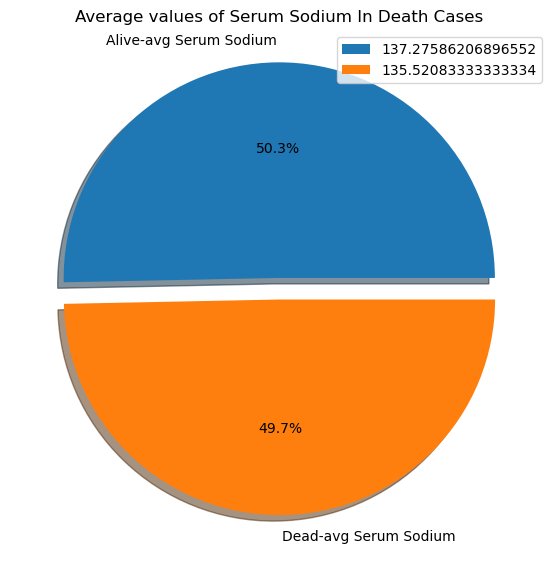

In [97]:
plt.figure(figsize=(10, 7))
death_SS = df.groupby('DEATH_EVENT')['serum_sodium'].mean()
myexplode = [0.1, 0]
plt.pie(death_SS, autopct='%.1f%%', labels=['Alive-avg Serum Sodium', 'Dead-avg Serum Sodium'], explode=myexplode, shadow=True)
plt.legend(death_SS, loc='upper right')
plt.title('Average values of Serum Sodium In Death Cases')
plt.show()


Korelasi antara kematian dan variabel lain

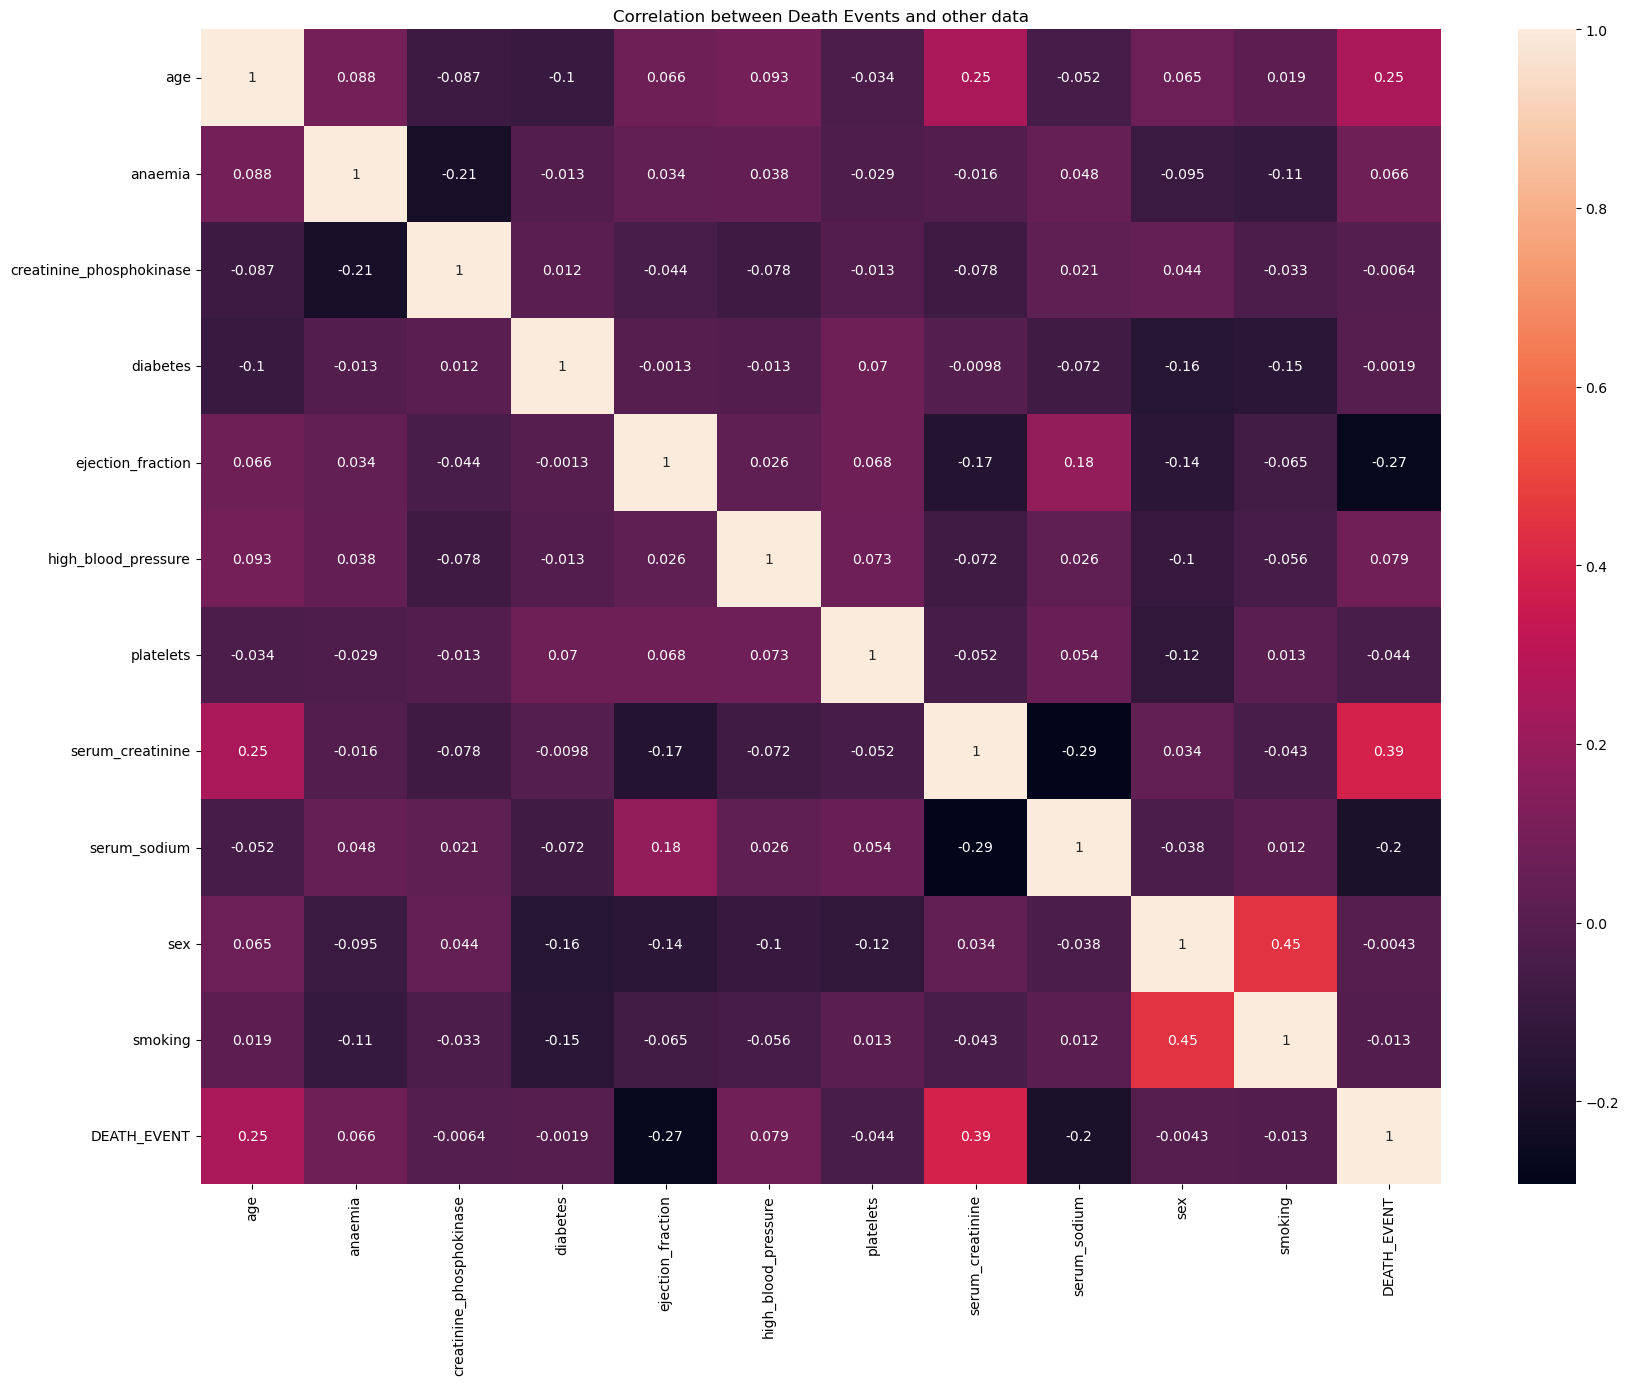

In [98]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between Death Events and other data')
plt.show()

- Interpretasi Output:
Berdasarkan output diatas, kematian memiliki korelasi yang sedang, dan lainnya memiliki korelasi yang sangat lemah (<0.2) dengan variabel lain. tingkat korelasi juga bisa dilihat dari warna yang tertera, semakin terang warnanya maka semakin kuat korelasinya.

# C. Train Model

In [99]:
df_new = df.copy()

In [100]:
# Memisahkan variabel independen dan dependen
X = df_new.drop(columns='DEATH_EVENT')
y = df_new['DEATH_EVENT']

In [101]:
# Membagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## C.1 Random Forest Classifier

In [102]:
# memasukkan algoritma random forest classifier
model_rfc = RandomForestClassifier(criterion='gini',
                                   bootstrap=False,
                                   random_state=0,
                                   n_estimators=1500,
                                    max_depth=5,
                                   min_samples_split=3,
                                   min_samples_leaf=4)

# fit model menggunakan training test
model_rfc.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_rfc = model_rfc.predict(X_test)

# melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_rfc)

print(classification_report(y_test,y_pred_rfc))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        62
           1       0.67      0.43      0.52        28

    accuracy                           0.76        90
   macro avg       0.72      0.67      0.68        90
weighted avg       0.74      0.76      0.74        90

Accuracy: 0.7555555555555555


### C.1.1 Visualisasi Confusion matrix random forest classifier


True Positives (TP) =  56

True Negatives (TN) =  12

False Positives (FP) =  6

False Negatives (FN) =  16


<AxesSubplot:>

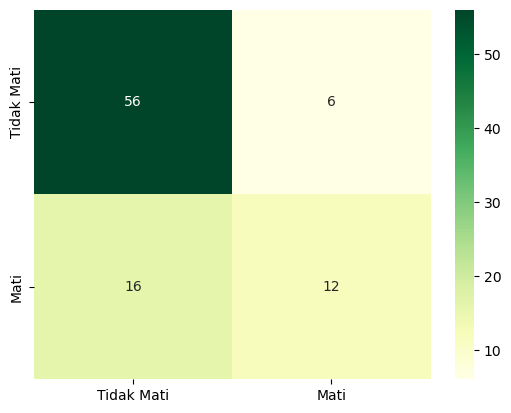

In [103]:
# membuat confusion matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
# memisahkan confusion matrix menjadi 4 bagian
print('\nTrue Positives (TP) = ', cm_rfc[0,0])

print('\nTrue Negatives (TN) = ', cm_rfc[1,1])

print('\nFalse Positives (FP) = ', cm_rfc[0,1])

print('\nFalse Negatives (FN) = ', cm_rfc[1,0])

TP_rfc = cm_rfc[0,0]
TN_rfc = cm_rfc[1,1]
FP_rfc = cm_rfc[0,1]
FN_rfc = cm_rfc[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_rfc = pd.DataFrame(data=cm_rfc, columns=['Tidak Mati', 'Mati'], 
                                 index=['Tidak Mati', 'Mati'])

sns.heatmap(cm_matrix_rfc, annot=True, fmt='d', cmap='YlGn')


Interpretasi output confusion matrix random forest classifier:
- 56 true positif pedictions: 56 pasien yang diprediksi hidup, benar hidup(tidak meninggal).
-  6 false positif prediction: 6 pasien yang diprediksi hidup, ternyata meninggal.
-  16 false negatif prediction: 16 pasien yang diprediksi meninggal, ternyata hidup (tidak meninggal).
-  12 true negatif prediction: 12 pasien yang diprediksi meninggal, benar meninggal.

### C.1.2 Visualisasi kurva roc random forest classifier

In [104]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) sebagai kemungkinan kematian
y_pred1_rfc= model_rfc.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC

roc_auc_rfc = roc_auc_score(y_test, y_pred1_rfc)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_rfc))

ROC AUC Logistic Regression: 0.7690


<Figure size 600x400 with 0 Axes>

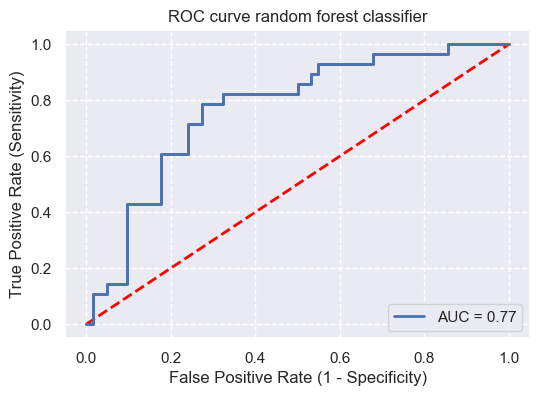

In [105]:
# plot kurva ROC 

fpr, tpr, thresholds = roc_curve(y_test, y_pred1_rfc, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rfc)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve random forest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



### C.1.3 Visualisasi Confusion matrix xg boost


True Positives (TP) =  55

True Negatives (TN) =  9

False Positives (FP) =  7

False Negatives (FN) =  19


<AxesSubplot:>

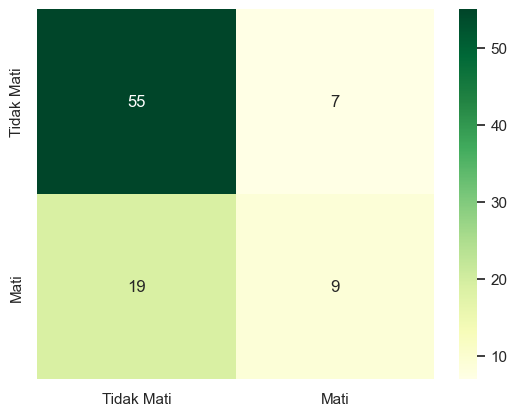

In [108]:
# membuat confusion matrix
cm_xgbo = confusion_matrix(y_test, y_pred_xgbo)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_xgbo[0,0])

print('\nTrue Negatives (TN) = ', cm_xgbo[1,1])

print('\nFalse Positives (FP) = ', cm_xgbo[0,1])

print('\nFalse Negatives (FN) = ', cm_xgbo[1,0])

TP_xgbo = cm_xgbo[0,0]
TN_xgbo = cm_xgbo[1,1]
FP_xgbo = cm_xgbo[0,1]
FN_xgbo = cm_xgbo[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_xgbo = pd.DataFrame(data=cm_xgbo, columns=['Tidak Mati', 'Mati'], 
                                 index=['Tidak Mati', 'Mati'])

sns.heatmap(cm_matrix_xgbo, annot=True, fmt='d', cmap='YlGn')


Interpretasi Output confusion matrix xg boost:
- 55 true positif pedictions: 55 pasien yang diprediksi hidup, benar hidup(tidak meninggal).
-  7 false positif prediction: 7 pasien yang diprediksi hidup, ternyata meninggal.
-  19 false negatif prediction: 19 pasien yang diprediksi meninggal, ternyata hidup (tidak meninggal).
-  9 true negatif prediction: 9 pasien yang diprediksi meninggal, benar meninggal.

### C.1.4 Visualisasi roc xg boost

In [109]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_xgbo= model_xgbo.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
roc_auc_xgbo = roc_auc_score(y_test, y_pred1_xgbo)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_xgbo))

ROC AUC Logistic Regression: 0.7448


<Figure size 600x400 with 0 Axes>

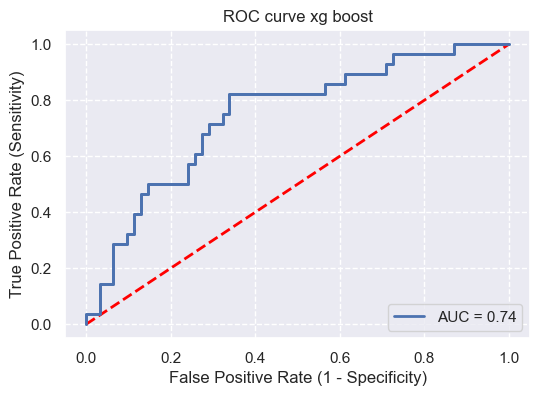

In [110]:
# plot kurva ROC 

fpr, tpr, thresholds = roc_curve(y_test, y_pred1_xgbo, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_xgbo)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve xg boost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



## C.2 Gradient Boosting Classifier

In [111]:
# memasukkan algoritma Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(n_estimators=50,
                                      learning_rate=0.1,
                                      max_depth=2)

# fit model menggunakan training test
model_gbc.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_gbc = model_gbc.predict(X_test)

# melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_gbc)

print(classification_report(y_test,y_pred_gbc))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        62
           1       0.55      0.43      0.48        28

    accuracy                           0.71        90
   macro avg       0.66      0.63      0.64        90
weighted avg       0.70      0.71      0.70        90

Accuracy: 0.7111111111111111


### C.2.1 Visualisasi Confusion matrix gradient boosting


True Positives (TP) =  52

True Negatives (TN) =  12

False Positives (FP) =  10

False Negatives (FN) =  16


<AxesSubplot:>

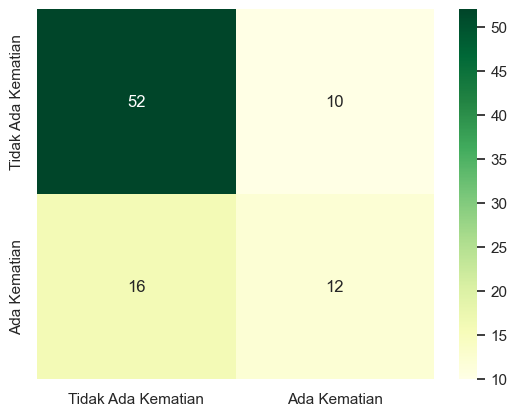

In [112]:
# membuat confusion matrix
cm_grbc = confusion_matrix(y_test, y_pred_gbc)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_grbc[0,0])

print('\nTrue Negatives (TN) = ', cm_grbc[1,1])

print('\nFalse Positives (FP) = ', cm_grbc[0,1])

print('\nFalse Negatives (FN) = ', cm_grbc[1,0])

TP_gbc = cm_grbc[0,0]
TN_gbc = cm_grbc[1,1]
FP_gbc = cm_grbc[0,1]
FN_gbc = cm_grbc[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_gbc = pd.DataFrame(data=cm_grbc, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_gbc, annot=True, fmt='d', cmap='YlGn')


Interpretasi output confusion matrix gradient boosting:
- 52 true positif pedictions: 52 pasien yang diprediksi hidup, benar hidup(tidak meninggal).
-  10 false positif prediction: 10 pasien yang diprediksi hidup, ternyata meninggal.
-  16 false negatif prediction: 16 pasien yang diprediksi meninggal, ternyata hidup (tidak meninggal).
-  12 true negatif prediction: 12 pasien yang diprediksi meninggal, benar meninggal.

### C.2.2 Visualisasi roc gradient boosting

In [113]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_gbc= model_gbc.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC

roc_auc_gbc = roc_auc_score(y_test, y_pred1_gbc)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_gbc))

ROC AUC Logistic Regression: 0.7517


<Figure size 600x400 with 0 Axes>

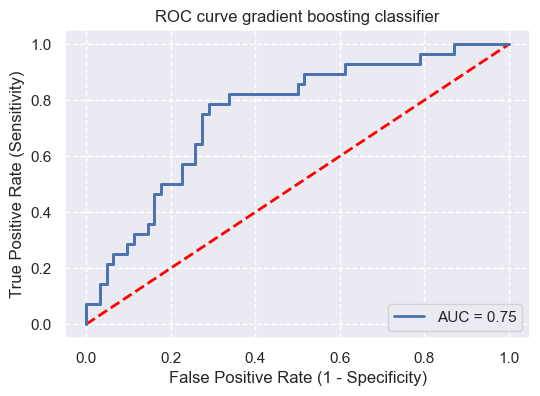

In [114]:
# plot kurva ROC 

fpr, tpr, thresholds = roc_curve(y_test, y_pred1_gbc, pos_label=1)

sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbc)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve gradient boosting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



## C.3 AdaBoost Classifier

In [115]:
# memasukkan algoritma AdaBoost Classifier
model_abc = AdaBoostClassifier(n_estimators=50,
                                      learning_rate=1)

# fit model menggunakan training test
model_abc.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_abc = model_abc.predict(X_test)

# melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_abc)

print(classification_report(y_test,y_pred_abc))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        62
           1       0.50      0.43      0.46        28

    accuracy                           0.69        90
   macro avg       0.63      0.62      0.62        90
weighted avg       0.68      0.69      0.68        90

Accuracy: 0.6888888888888889


### C.3.1 Visualisasi Confusion matrix adaboost classifier


True Positives (TP) =  50

True Negatives (TN) =  12

False Positives (FP) =  12

False Negatives (FN) =  16


<AxesSubplot:>

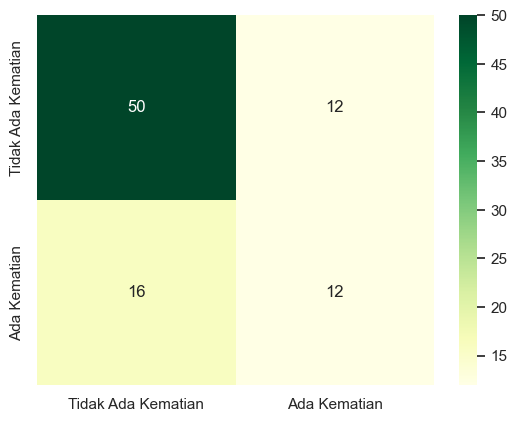

In [116]:
# membuat confusion matrix
cm_abc = confusion_matrix(y_test, y_pred_abc)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_abc[0,0])

print('\nTrue Negatives (TN) = ', cm_abc[1,1])

print('\nFalse Positives (FP) = ', cm_abc[0,1])

print('\nFalse Negatives (FN) = ', cm_abc[1,0])

TP_abc = cm_abc[0,0]
TN_abc = cm_abc[1,1]
FP_abc = cm_abc[0,1]
FN_abc = cm_abc[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_abc = pd.DataFrame(data=cm_abc, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_abc, annot=True, fmt='d', cmap='YlGn')


Interpretasi Output confusion matrix adaboost classifier:
- 50 true positif pedictions: 50 pasien yang diprediksi hidup, benar hidup(tidak meninggal).
-  12 false positif prediction: 12 pasien yang diprediksi hidup, ternyata meninggal.
-  16 false negatif prediction: 16 pasien yang diprediksi meninggal, ternyata hidup (tidak meninggal).
-  12 true negatif prediction: 12 pasien yang diprediksi meninggal, benar meninggal.

### C.3.2 Visualisasi roc adaboost classifier

In [117]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_abc= model_abc.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC

roc_auc_abc = roc_auc_score(y_test, y_pred1_abc)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_abc))

ROC AUC Logistic Regression: 0.7117


<Figure size 600x400 with 0 Axes>

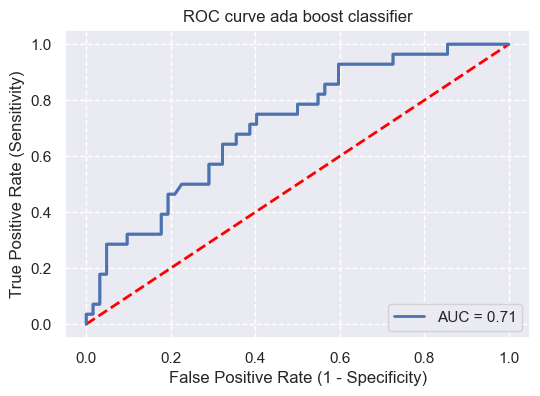

In [118]:
# plot kurva ROC 

fpr, tpr, thresholds = roc_curve(y_test, y_pred1_abc, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_abc)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve ada boost classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



## C.4 Extra Trees Classifier

In [119]:
# memasukkan algoritma Extra Trees Classifier
model_etc = ExtraTreesClassifier(n_estimators=50,
                                  criterion='entropy',
                                  max_features=2)

# fit model menggunakan training test
model_etc.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_etc = model_etc.predict(X_test)

# melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_etc)

print(classification_report(y_test,y_pred_etc))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_etc))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        62
           1       0.61      0.39      0.48        28

    accuracy                           0.73        90
   macro avg       0.69      0.64      0.65        90
weighted avg       0.72      0.73      0.71        90

Accuracy: 0.7333333333333333


### C.4.1 Visualisasi Confusion matrix extra trees classifier


True Positives (TP) =  55

True Negatives (TN) =  11

False Positives (FP) =  7

False Negatives (FN) =  17


<AxesSubplot:>

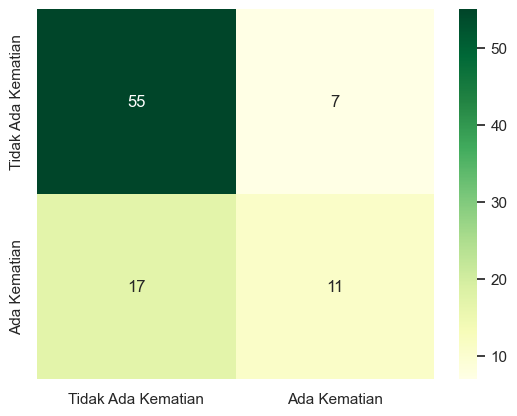

In [120]:
# membuat confusion matrix
cm_etc = confusion_matrix(y_test, y_pred_etc)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_etc[0,0])

print('\nTrue Negatives (TN) = ', cm_etc[1,1])

print('\nFalse Positives (FP) = ', cm_etc[0,1])

print('\nFalse Negatives (FN) = ', cm_etc[1,0])

TP_etc = cm_etc[0,0]
TN_etc = cm_etc[1,1]
FP_etc = cm_etc[0,1]
FN_etc = cm_etc[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_etc = pd.DataFrame(data=cm_etc, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_etc, annot=True, fmt='d', cmap='YlGn')


Interpretasi Output confusion matrix extra  trees classifier:
- 56 true positif pedictions: 56 pasien yang diprediksi hidup, benar hidup(tidak meninggal).
-  7 false positif prediction: 7 pasien yang diprediksi hidup, ternyata meninggal.
-  17 false negatif prediction: 17 pasien yang diprediksi meninggal, ternyata hidup (tidak meninggal).
-  11 true negatif prediction: 11 pasien yang diprediksi meninggal, benar meninggal.

### C.4.2 Visualisasi roc extra trees classifier

In [121]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_etc= model_etc.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
roc_auc_etc = roc_auc_score(y_test, y_pred1_etc)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_etc))

ROC AUC Logistic Regression: 0.7261


<Figure size 600x400 with 0 Axes>

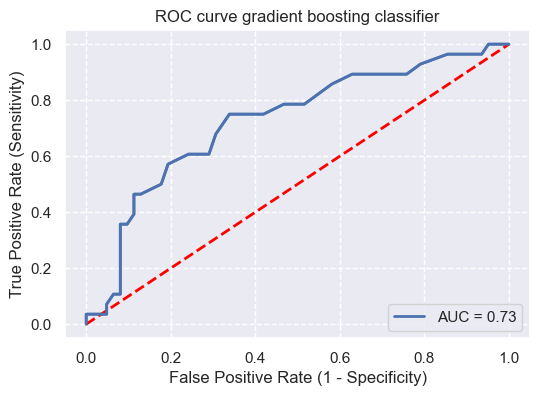

In [122]:
# plot kurva ROC 

fpr, tpr, thresholds = roc_curve(y_test, y_pred1_etc, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_etc)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve gradient boosting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



# D. Evaluasi Model

## D.1 Random Forest Classifier

In [123]:
param_grid_rfc = {'n_estimators': [25, 50, 100, 150],
                  'max_features': ['sqrt', 'log2', None],
                  'max_depth': [3, 6, 9],
                  'max_leaf_nodes': [3, 6, 9]
                  }


model_rfc2 = RandomForestClassifier(criterion='gini',
                           bootstrap=False, 
                           random_state=0
)
search_rfc = RandomizedSearchCV(estimator=model_rfc2, 
                           param_distributions=param_grid_rfc,cv=5)

search_rfc.fit(X_train, y_train)
print("melakukan hiperparameter :(parameter terbaik) ",search_rfc.best_params_)
best_model = search_rfc.best_estimator_
print("estimator terbaik:",best_model)



melakukan hiperparameter :(parameter terbaik)  {'n_estimators': 100, 'max_leaf_nodes': 9, 'max_features': 'log2', 'max_depth': 6}
estimator terbaik: RandomForestClassifier(bootstrap=False, max_depth=6, max_features='log2',
                       max_leaf_nodes=9, random_state=0)


In [124]:
# memasukkan algoritma random forest classifier
model_rfc2 = RandomForestClassifier(criterion='gini',
                                   bootstrap=False,
                                   random_state=0,
                                   n_estimators=150,
                                    max_depth=3,
                                   max_leaf_nodes=6,
                                   max_features='sqrt')

# fit model menggunakan training test
model_rfc2.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_rfc2 = model_rfc2.predict(X_test)

# melihat accuracy score
accuracy_score_log_rfc2 = accuracy_score(y_test,y_pred_rfc2)

print(classification_report(y_test,y_pred_rfc2))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_rfc2))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        62
           1       0.57      0.29      0.38        28

    accuracy                           0.71        90
   macro avg       0.65      0.59      0.60        90
weighted avg       0.69      0.71      0.68        90

Accuracy: 0.7111111111111111


### D.1.1 Visualisasi Confusion matrix random forest classifier


True Positives (TP) =  56

True Negatives (TN) =  8

False Positives (FP) =  6

False Negatives (FN) =  20


<AxesSubplot:>

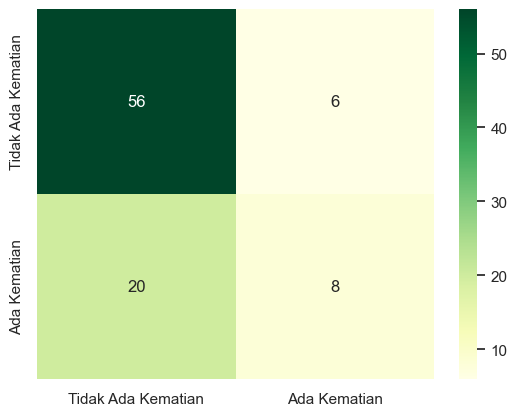

In [125]:
# membuat confusion matrix
cm_rfc2 = confusion_matrix(y_test, y_pred_rfc2)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_rfc2[0,0])

print('\nTrue Negatives (TN) = ', cm_rfc2[1,1])

print('\nFalse Positives (FP) = ', cm_rfc2[0,1])

print('\nFalse Negatives (FN) = ', cm_rfc2[1,0])

TP_rfc2 = cm_rfc2[0,0]
TN_rfc2 = cm_rfc2[1,1]
FP_rfc2 = cm_rfc2[0,1]
FN_rfc2 = cm_rfc2[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_rfc2 = pd.DataFrame(data=cm_rfc2, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_rfc2, annot=True, fmt='d', cmap='YlGn')


Interpretasi Output confusion matrix random forest classifier:
- 56 true positif pedictions: 56 pasien yang diprediksi hidup, benar hidup(tidak meninggal).
-  6 false positif prediction: 6 pasien yang diprediksi hidup, ternyata meninggal.
-  20 false negatif prediction: 20 pasien yang diprediksi meninggal, ternyata hidup (tidak meninggal).
-  8 true negatif prediction: 8 pasien yang diprediksi meninggal, benar meninggal.

### D.1.2 Visualisasi roc random fores classifier 

In [126]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_rfc2= model_rfc2.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
roc_auc_rfc2 = roc_auc_score(y_test, y_pred1_rfc2)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_rfc2))

ROC AUC Logistic Regression: 0.7800


<Figure size 600x400 with 0 Axes>

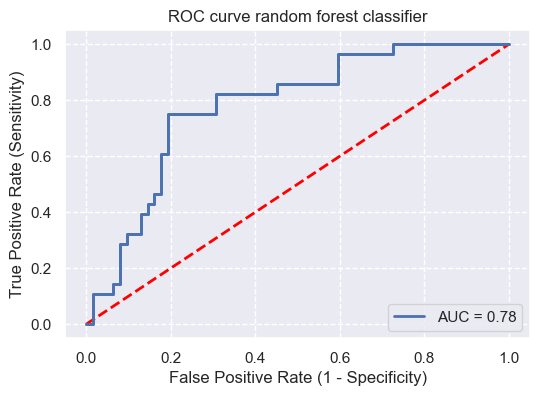

In [127]:
# plot kurva ROC 

fpr, tpr, thresholds = roc_curve(y_test, y_pred1_rfc2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rfc2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve random forest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



### D.1.3 Visualisasi feature importance random forest classifier

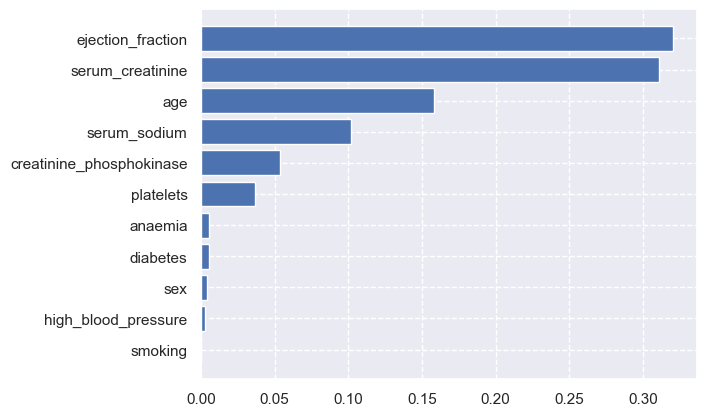

In [128]:
importance_rfc = model_rfc2.feature_importances_
indices_rfc = np.argsort(importance_rfc)
fig, ax = plt.subplots()
ax.barh(range(len(importance_rfc)), importance_rfc[indices_rfc])
ax.set_yticks(range(len(importance_rfc)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_rfc])

## D.2 XG Boost

In [129]:

parameter={'max_depth':[2,4,6,8],
           'learning_rate':[0.01, 0.1, 0.2],
           'n_estimators':[75,100]
           }
mod_xgboo2=XGBClassifier(objective='binary:logistic',nthread=4)
search_xgboo2=RandomizedSearchCV(estimator=mod_xgboo2,
                                 param_distributions=parameter,
                                 n_iter=20,
                                 scoring='f1',
                                 refit='f1',
                                 n_jobs=-1,
                                 cv=5,
                                 verbose=1)
search_xgboo2.fit(X_train,y_train)
print("hiperparameter",search_xgboo2.best_params_)
best_model=search_xgboo2.best_estimator_
print("best estimator:",best_model)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


hiperparameter {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01}
best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)


In [130]:
#membuat logres
mod_xgbo2=XGBClassifier(max_depth=2,
                        learning_rate=0.2,
                        n_estimators=75,
                        n_iter=20,
                        scoring='f1',
                        refit='f1',
                        n_jobs=-1,
                        cv=5,
                        verbose=1)
#train model dengan training sets
mod_xgbo2.fit(X_train, y_train)
#prediksi respon untuk test dataset
y_pred_xgbo2=mod_xgbo2.predict(X_test)
#melihat accuracy score
accuracy_score_log_xgbo2=accuracy_score(y_test, y_pred_xgbo2)

print(classification_report(y_test, y_pred_xgbo2))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgbo2))

[09:53:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "cv", "n_iter", "refit", "scoring", "verbose" } are not used.

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        62
           1       0.50      0.39      0.44        28

    accuracy                           0.69        90
   macro avg       0.62      0.61      0.61        90
weighted avg       0.67      0.69      0.68        90

Accuracy: 0.6888888888888889


### D.2.1 Visualisasi Confusion matrix xg boost


True Positives (TP) =  51

True Negatives (TN) =  11

False Positives (FP) =  11

False Negatives (FN) =  17


<AxesSubplot:>

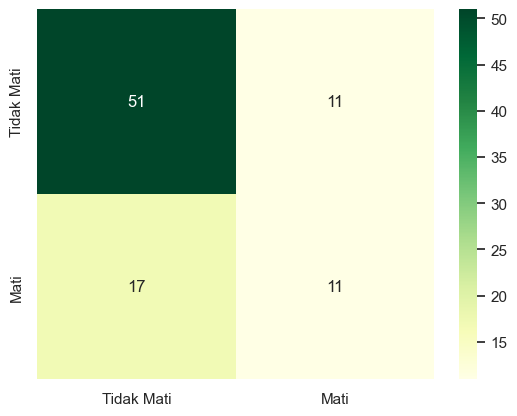

In [131]:
# membuat confusion matrix
cm_xgbo2 = confusion_matrix(y_test, y_pred_xgbo2)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_xgbo2[0,0])

print('\nTrue Negatives (TN) = ', cm_xgbo2[1,1])

print('\nFalse Positives (FP) = ', cm_xgbo2[0,1])

print('\nFalse Negatives (FN) = ', cm_xgbo2[1,0])

TP_xgbo2 = cm_xgbo2[0,0]
TN_xgbo2 = cm_xgbo2[1,1]
FP_xgbo2 = cm_xgbo2[0,1]
FN_xgbo2 = cm_xgbo2[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_xgbo2 = pd.DataFrame(data=cm_xgbo2, columns=['Tidak Mati', 'Mati'], 
                                 index=['Tidak Mati', 'Mati'])

sns.heatmap(cm_matrix_xgbo2, annot=True, fmt='d', cmap='YlGn')


Interpretasi Output confusion matrix xg boost:
- 51 true positif pedictions: 51 pasien yang diprediksi hidup, benar hidup(tidak meninggal).
-  11 false positif prediction: 11 pasien yang diprediksi hidup, ternyata meninggal.
-  17 false negatif prediction: 17 pasien yang diprediksi meninggal, ternyata hidup (tidak meninggal).
-  11 true negatif prediction: 11 pasien yang diprediksi meninggal, benar meninggal.

### D.2.2 Visualisasi roc xg boost

In [132]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_xgbo2= mod_xgbo2.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC

roc_auc_xgbo2 = roc_auc_score(y_test, y_pred1_xgbo2)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_xgbo2))

ROC AUC Logistic Regression: 0.7103


<Figure size 600x400 with 0 Axes>

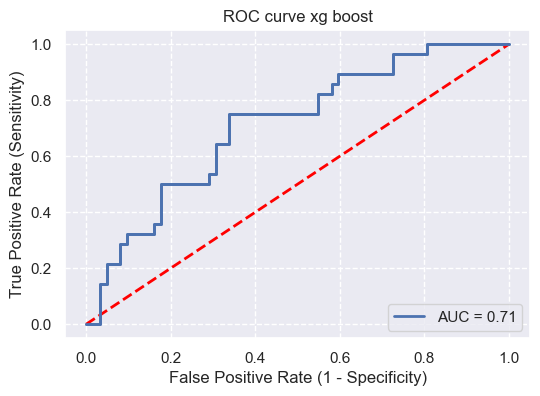

In [133]:
# plot kurva ROC 

fpr, tpr, thresholds = roc_curve(y_test, y_pred1_xgbo2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_xgbo2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve xg boost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



### D.2.3 Visualisasi feature importance xg boost

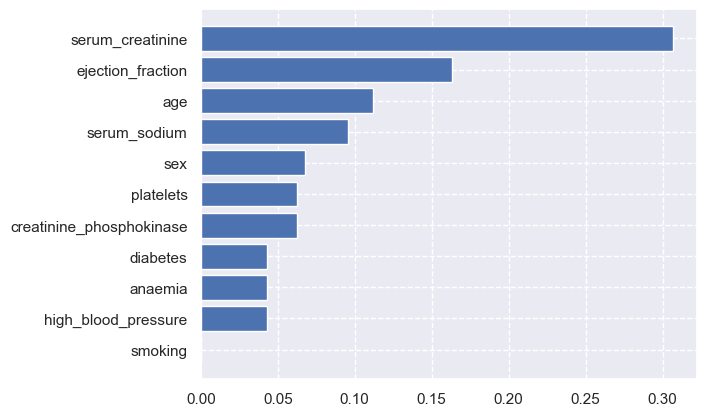

In [134]:
importance_xgb = mod_xgbo2.feature_importances_
indices_xgb = np.argsort(importance_xgb)
fig, ax = plt.subplots()
ax.barh(range(len(importance_xgb)), importance_xgb[indices_xgb])
ax.set_yticks(range(len(importance_xgb)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_xgb])


## D.3 Gradient Boost Classifier

In [135]:

param_grid_gbc = {'n_estimators':[10,50,100],
                    'learning_rate':[0.01, 0.1, 0.100],
                    'max_depth':[2,4,6,8]
              }


model_gbc2 = GradientBoostingClassifier()
search_gbc = RandomizedSearchCV(estimator=model_gbc2, 
                           param_distributions=param_grid_gbc)

search_gbc.fit(X_train, y_train)
print("meningkatkan dengan hiperparameter :(parameter terbaik) ",search_gbc.best_params_)
best_model = search_gbc.best_estimator_
print("estimator terbaik:",best_model)

meningkatkan dengan hiperparameter :(parameter terbaik)  {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1}
estimator terbaik: GradientBoostingClassifier(max_depth=2)


In [136]:
# membuat gradient boosting classifier
model_gbc2 = GradientBoostingClassifier(n_estimators=10,
                                      learning_rate=0.1,
                                      max_depth=2)

# fit model menggunakan training test
model_gbc2.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_gbc2 = model_gbc2.predict(X_test)

# melihat accuracy score
accuracy_score_log_gbc2 = accuracy_score(y_test,y_pred_gbc2)

print(classification_report(y_test,y_pred_gbc2))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_gbc2))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        62
           1       0.70      0.25      0.37        28

    accuracy                           0.73        90
   macro avg       0.72      0.60      0.60        90
weighted avg       0.73      0.73      0.69        90

Accuracy: 0.7333333333333333


### D.3.1 Visualisasi Confussion matrix gradient boosting


True Positives (TP) =  59

True Negatives (TN) =  7

False Positives (FP) =  3

False Negatives (FN) =  21


<AxesSubplot:>

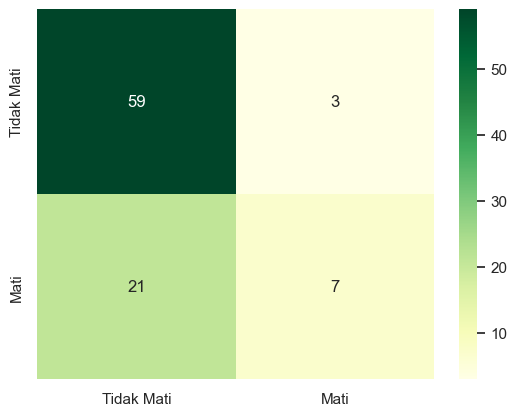

In [137]:
# membuat confusion matrix
cm_gbc2 = confusion_matrix(y_test, y_pred_gbc2)
# memisahkan confusion matrix menjadi 4 bagian
print('\nTrue Positives (TP) = ', cm_gbc2[0,0])

print('\nTrue Negatives (TN) = ', cm_gbc2[1,1])

print('\nFalse Positives (FP) = ', cm_gbc2[0,1])

print('\nFalse Negatives (FN) = ', cm_gbc2[1,0])

TP_gbc2 = cm_gbc2[0,0]
TN_gbc2 = cm_gbc2[1,1]
FP_gbc2 = cm_gbc2[0,1]
FN_gbc2 = cm_gbc2[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_gbc2 = pd.DataFrame(data=cm_gbc2, columns=['Tidak Mati', 'Mati'], 
                                 index=['Tidak Mati', 'Mati'])

sns.heatmap(cm_matrix_gbc2, annot=True, fmt='d', cmap='YlGn')


Interpretasi Output confusion matrix gradient boosting:
- 59 true positif pedictions: 59 pasien yang diprediksi hidup, benar hidup(tidak meninggal).
-  3 false positif prediction: 3 pasien yang diprediksi hidup, ternyata meninggal.
-  21 false negatif prediction: 21 pasien yang diprediksi meninggal, ternyata hidup (tidak meninggal).
-  7 true negatif prediction: 7 pasien yang diprediksi meninggal, benar meninggal.

### D.3.2 Visualisasi roc gradient boosting

In [138]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_gbc2= model_gbc2.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
roc_auc_gbc2 = roc_auc_score(y_test, y_pred1_gbc2)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_gbc2))

ROC AUC Logistic Regression: 0.7710


<Figure size 600x400 with 0 Axes>

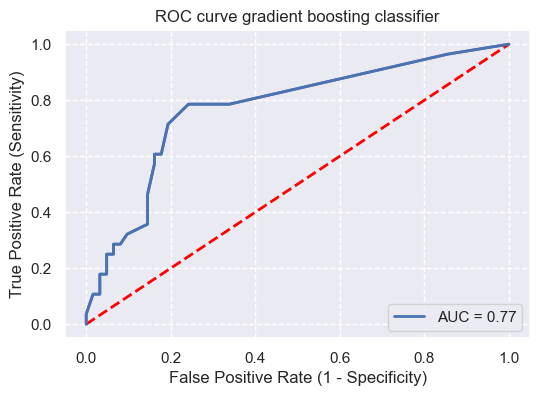

In [139]:
# plot kurva ROC 

fpr, tpr, thresholds = roc_curve(y_test, y_pred1_gbc2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbc2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve gradient boosting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



### D.3.3 Visualisasi feature importance gradient boost classifier

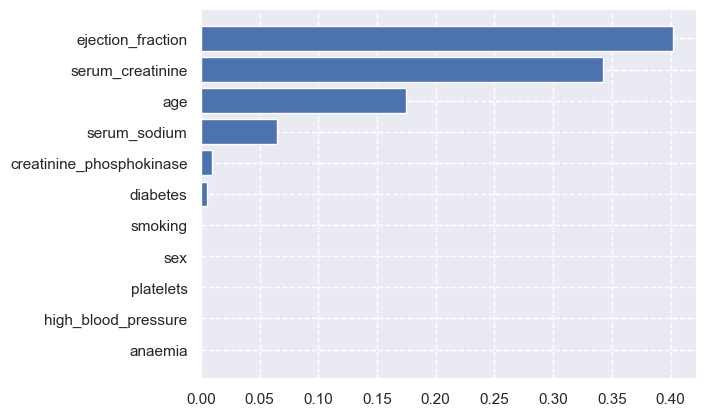

In [140]:
importance_gbc = model_gbc2.feature_importances_
indices_gbc = np.argsort(importance_gbc)
fig, ax = plt.subplots()
ax.barh(range(len(importance_gbc)), importance_gbc[indices_gbc])
ax.set_yticks(range(len(importance_gbc)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_gbc])

## D.4 Adaboost classifier

In [141]:
# mencari parameter
param_grid_abc = {'n_estimators':[50,70,100],
                  'learning_rate':[0.01, 0.1, 0.100],
                  'algorithm': ['SAMME', 'SAMME.R']
              }


model_abc2 = AdaBoostClassifier()
search_abc = RandomizedSearchCV(estimator=model_abc2, 
                           param_distributions=param_grid_abc)

search_abc.fit(X_train, y_train)
print("meningkatkan dengan hiperparameter :(parameter terbaik) ",search_abc.best_params_)
best_model = search_abc.best_estimator_
print("estimator terbaik:",best_model)

meningkatkan dengan hiperparameter :(parameter terbaik)  {'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
estimator terbaik: AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


In [142]:
# membuat adaboost classifier
model_abc2 = AdaBoostClassifier(n_estimators=50,
                                learning_rate=0.1,
                                algorithm='SAMME.R')

# fit model menggunakan training test
model_abc2.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_abc2 = model_abc2.predict(X_test)

# melihat accuracy score
accuracy_score_log_abc2 = accuracy_score(y_test,y_pred_abc2)

print(classification_report(y_test,y_pred_abc2))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_abc2))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        62
           1       0.58      0.25      0.35        28

    accuracy                           0.71        90
   macro avg       0.66      0.58      0.58        90
weighted avg       0.68      0.71      0.67        90

Accuracy: 0.7111111111111111


### D.4.1 Visualisasi confussion matrix adaboost classifier


True Positives (TP) =  57

True Negatives (TN) =  7

False Positives (FP) =  5

False Negatives (FN) =  21


<AxesSubplot:>

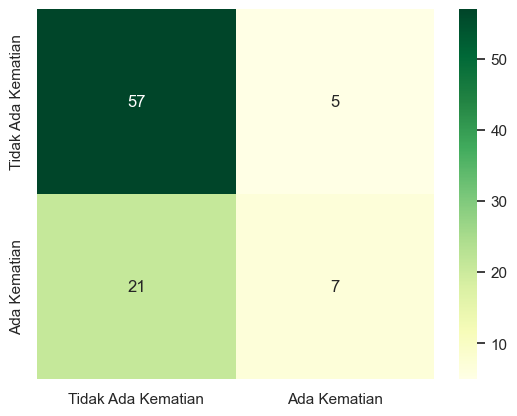

In [143]:
# membuat confusion matrix
cm_abc2 = confusion_matrix(y_test, y_pred_abc2)
# memisahkan confusion matrix menjadi 4 bagian
print('\nTrue Positives (TP) = ', cm_abc2[0,0])

print('\nTrue Negatives (TN) = ', cm_abc2[1,1])

print('\nFalse Positives (FP) = ', cm_abc2[0,1])

print('\nFalse Negatives (FN) = ', cm_abc2[1,0])

TP_abc2 = cm_abc2[0,0]
TN_abc2 = cm_abc2[1,1]
FP_abc2 = cm_abc2[0,1]
FN_abc2 = cm_abc2[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_abc2 = pd.DataFrame(data=cm_abc2, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_abc2, annot=True, fmt='d', cmap='YlGn')


Interpretasi output confusion matrix adaboost classifier:
- 57 true positif pedictions: 57 pasien yang diprediksi hidup, benar hidup(tidak meninggal).
-  5 false positif prediction: 5 pasien yang diprediksi hidup, ternyata meninggal.
-  21 false negatif prediction: 21 pasien yang diprediksi meninggal, ternyata hidup (tidak meninggal).
-  7 true negatif prediction: 7 pasien yang diprediksi meninggal, benar meninggal.

### D.4.2 Visualisasi roc adaboost classifier

In [144]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_abc2= model_abc2.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
roc_auc_abc2 = roc_auc_score(y_test, y_pred1_abc2)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_abc2))

ROC AUC Logistic Regression: 0.7437


<Figure size 600x400 with 0 Axes>

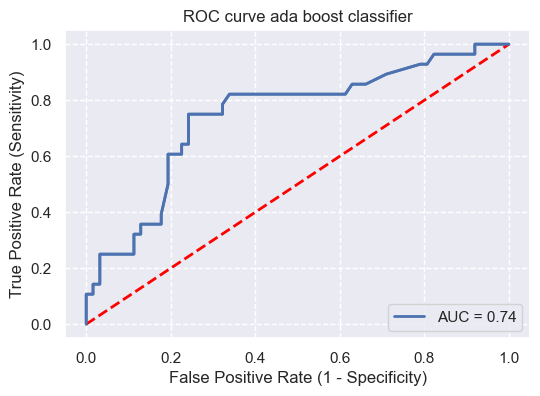

In [145]:
# plot kurva ROC 

fpr, tpr, thresholds = roc_curve(y_test, y_pred1_abc2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_abc2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve ada boost classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



### D.4.3 Visualisasi feature importance adaboost classifier

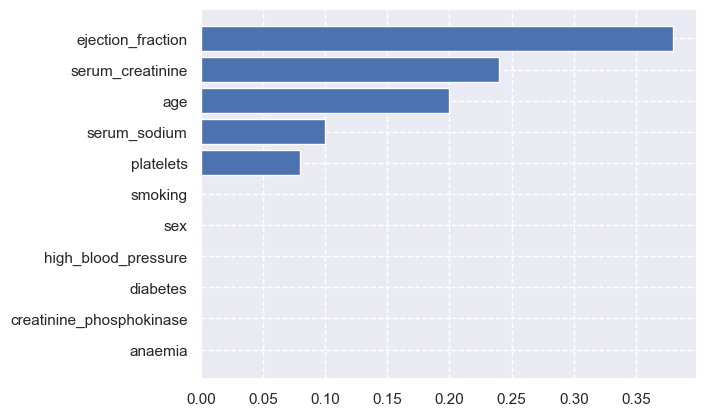

In [146]:
importance_abc = model_abc2.feature_importances_
indices_abc = np.argsort(importance_abc)
fig, ax = plt.subplots()
ax.barh(range(len(importance_abc)), importance_abc[indices_abc])
ax.set_yticks(range(len(importance_abc)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_abc])


## D.5 Extra trees classifier

In [147]:
# mencari parameter
param_grid_etc = {'n_estimators': [10,50,100],
                  'criterion': ["gini", "entropy", "log_loss"],
                  'max_depth': [2,8,16,32,50],
                  'max_features': ['sqrt', 'log2', None],   
                  'bootstrap': [True, False],
                  'warm_start': [True, False]
                  }

model_etc2 = ExtraTreesClassifier()
search_etc = RandomizedSearchCV(estimator=model_etc2, 
                           param_distributions=param_grid_etc)

search_etc.fit(X_train, y_train)
print("meningkatkan dengan hiperparameter :(parameter terbaik) ",search_etc.best_params_)
best_model = search_etc.best_estimator_
print("estimator terbaik:",best_model)

meningkatkan dengan hiperparameter :(parameter terbaik)  {'warm_start': False, 'n_estimators': 50, 'max_features': None, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': False}
estimator terbaik: ExtraTreesClassifier(max_depth=8, max_features=None, n_estimators=50)


In [170]:
# membuat extra trees classifier
model_etc2 = ExtraTreesClassifier(warm_start=False,
                                  n_estimators=10,
                                  max_features=None,
                                  max_depth=16,
                                  criterion='gini',
                                  bootstrap=True)

# fit model menggunakan training test
model_etc2.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_etc2 = model_etc.predict(X_test)

# melihat accuracy score
accuracy_score_log_etc2 = accuracy_score(y_test,y_pred_etc2)

print(classification_report(y_test,y_pred_etc2))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_etc2))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        62
           1       0.61      0.39      0.48        28

    accuracy                           0.73        90
   macro avg       0.69      0.64      0.65        90
weighted avg       0.72      0.73      0.71        90

Accuracy: 0.7333333333333333


### D.5.1 Visualisasi confussion matrix extra trees classifier


True Positives (TP) =  55

True Negatives (TN) =  11

False Positives (FP) =  7

False Negatives (FN) =  17


<AxesSubplot:>

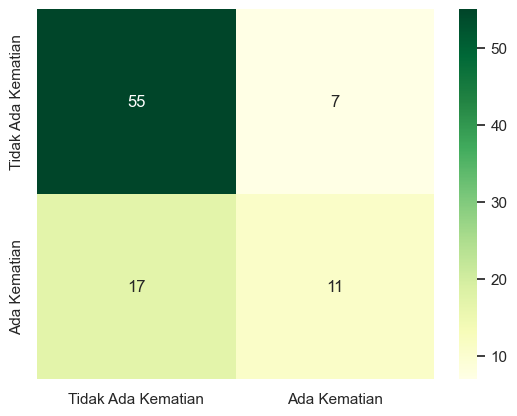

In [149]:
# membuat confusion matrix
cm_etc2 = confusion_matrix(y_test, y_pred_etc2)
# memisahkan confusion matrix menjadi 4 bagian
print('\nTrue Positives (TP) = ', cm_etc2[0,0])

print('\nTrue Negatives (TN) = ', cm_etc2[1,1])

print('\nFalse Positives (FP) = ', cm_etc2[0,1])

print('\nFalse Negatives (FN) = ', cm_etc2[1,0])

TP_etc2 = cm_etc2[0,0]
TN_etc2 = cm_etc2[1,1]
FP_etc2 = cm_etc2[0,1]
FN_etc2 = cm_etc2[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_etc2 = pd.DataFrame(data=cm_etc2, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_etc2, annot=True, fmt='d', cmap='YlGn')


Interpretasi Output confusion matrix extra trees classifier:
- 55 true positif pedictions: 55 pasien yang diprediksi hidup, benar hidup(tidak meninggal).
-  7 false positif prediction: 7 pasien yang diprediksi hidup, ternyata meninggal.
-  17 false negatif prediction: 17 pasien yang diprediksi meninggal, ternyata hidup (tidak meninggal).
-  11 true negatif prediction: 11 pasien yang diprediksi meninggal, benar meninggal.

### D.5.2 Visualisasi roc extra trees classifier

In [150]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_etc2= model_etc.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
roc_auc_etc2 = roc_auc_score(y_test, y_pred1_etc2)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_etc2))

ROC AUC Logistic Regression: 0.7261


<Figure size 600x400 with 0 Axes>

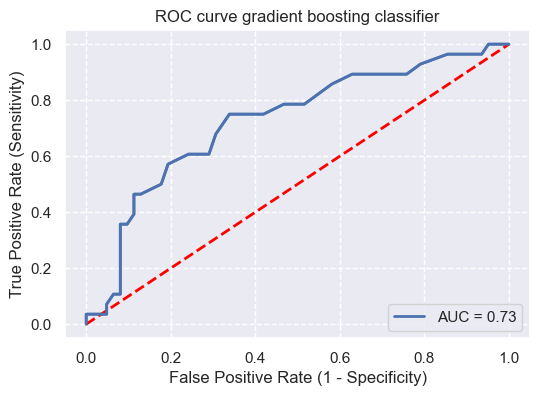

In [151]:
# plot kurva ROC 

fpr, tpr, thresholds = roc_curve(y_test, y_pred1_etc2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_etc2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve gradient boosting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



### D.5.3 Visualisasi feature importence extra trees classifier

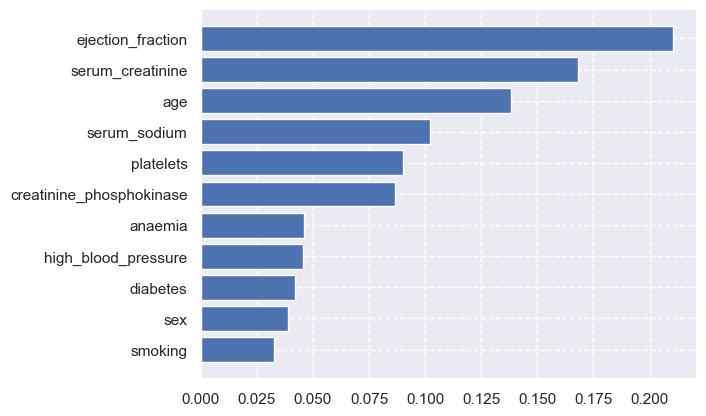

In [152]:
importance_etc = model_etc2.feature_importances_
indices_etc = np.argsort(importance_etc)
fig, ax = plt.subplots()
ax.barh(range(len(importance_etc)), importance_etc[indices_etc])
ax.set_yticks(range(len(importance_etc)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_etc])


# E. Model Inference

In [153]:
#prediksi kematian dengan input diluar dataset
age=57
anaemia='N'
creatinine_phosphokinase=10
diabetes='Y'
ejection_fraction=45
high_blood_pressure='Y'
platelets=70000
serum_creatinine=1.5
serum_sodium=120
sex='M'
smoking='Y'

features=[age,serum_creatinine,ejection_fraction,serum_sodium,
          creatinine_phosphokinase,platelets]  


if sex=='M':
    features.append(1)
elif sex=='F':
    features.append(0)
    
if anaemia=='Y':
    features.append(1)
elif anaemia=='N':
    features.append(0)

if diabetes=='Y':
    features.append(1)
elif diabetes=='N':
    features.append(0)
    
if high_blood_pressure=='Y':
    features.append(1)
elif high_blood_pressure=='N':
    features.append(0)
    
if smoking=='Y':
    features.append(1)
elif smoking=='N':
    features.append(0)
    
prediksi=model_gbc2.predict([features])

if prediksi==1:
    prediction='Meninggal'
elif prediksi==0:
    prediction='Tidak meninggal'
print('Diprediksi pasien',prediction)

Diprediksi pasien Meninggal


In [154]:
print(features)

[57, 1.5, 45, 120, 10, 70000, 1, 0, 1, 1, 1]


# F. Kesimpulan

## F.1 Dilihat dari tingkat Akurasi

In [166]:
# Hasil akurasi dari beberapa model machine learning
print('Berikut adalah hasil beberapa akurasi dari model machine learning')
print('The accuration of random rorest classifier:', accuracy_score_log_rfc2)
print('The accuration of xg boost:', accuracy_score_log_xgbo2)
print('The accuration of gradient boosting classifier:', accuracy_score_log_gbc2)
print('The accuration of adaboost classifier:', accuracy_score_log_abc2)
print('The accuration of extra trees classifier:', accuracy_score_log_etc2)

Berikut adalah hasil beberapa akurasi dari model machine learning
The accuration of random rorest classifier: 0.7111111111111111
The accuration of xg boost: 0.6888888888888889
The accuration of gradient boosting classifier: 0.7333333333333333
The accuration of adaboost classifier: 0.7111111111111111
The accuration of extra trees classifier: 0.7333333333333333


## F.2 Dilihat dari Korelasi

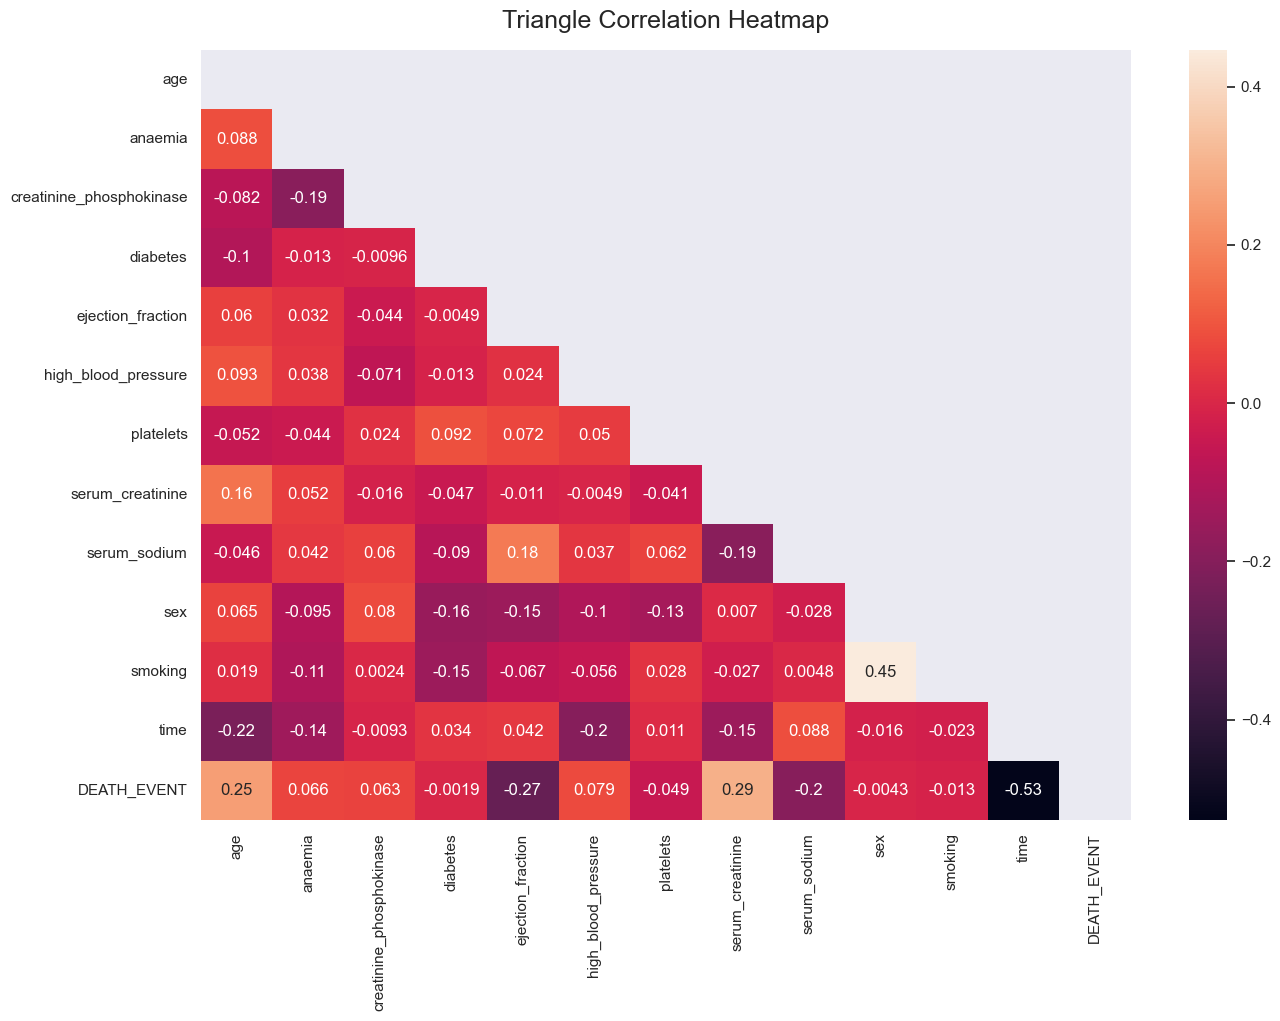

In [171]:
# visualisasi nilai korelasi atribut dengan heatmap
plt.subplots(figsize=(15,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

**KESIMPULAN SECARA KESELURUHAN**

Berdasarkan model ensemble yang dijalankan pada dataset terlihat bahwa akurasi tertinggi menggunakan gradient boosting classifier dan extra trees classifier dengan besaran akurasi 73% berdasarkan data di atas tingkat akurasi gradient boosting dan extra trees yang paling tinggi dibandingkan logaritma ensemble yang lainnya. Jika dilihat dari tingkat korelasi, age dan serum_creatinine memiliki korelasi tertinggi dengan Death event sedangkan yang lain cenderung rendah. 